In [1]:
import logging
import math
import numpy as np
import pandas as pd
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
from scipy.stats import rankdata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import rankdata

In [2]:
mRNA_244_df=pd.read_csv('/Users/chen/Desktop/研究生毕业论文/mRNA_244_df.csv',header=0)
#clinical_244_df=pd.read_csv('/Users/chen/Desktop/研究生毕业论文/clinical_df_244_created.csv',header=0)

/Users/chen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244) have mixed type

In [3]:
mRNA_df_00=mRNA_244_df['Hugo_Symbol']
mRNA_df_11=mRNA_244_df.iloc[1:,1:].astype('float64')
mRNA_244_df=pd.concat([mRNA_df_00,mRNA_df_11],axis=1)
mRNA_244_df=mRNA_244_df.iloc[1:,1:]  ##这个改一下就可以了把 



In [4]:
print(mRNA_df_00)

0        SAMPLE_ID
1            OR4F5
2           SAMD11
3           KLHL17
4          PLEKHN1
           ...    
14376       MT-ND1
14377       MT-CO1
14378       MT-ND3
14379       MT-CYB
14380      Tm_Rank
Name: Hugo_Symbol, Length: 14381, dtype: object


In [5]:
print(mRNA_244_df.shape) ### first row:Hugo_Symbol  ##last row Tm ## 0 column :sample name 
print(mRNA_244_df.iloc[:,-1]) ##last row

(14380, 244)
1           0.000
2           0.825
3           0.923
4           2.231
5         139.480
           ...   
14376    5053.302
14377    8878.197
14378    5063.897
14379    4449.383
14380     243.000
Name: 217, Length: 14380, dtype: float64


In [6]:
patient_mRNA = []
for column in mRNA_244_df:
    
#print(mRNA_244_df[column].tolist())
    patient_mRNA.append(mRNA_244_df[column].tolist())
#print(patient_mRNA[0])
patient_np = np.asarray(patient_mRNA)


In [7]:
print(patient_np.dtype)
print(patient_np.shape)    

float64
(244, 14380)


In [8]:
###min and max
min_list=[]
max_list=[]
mean_list=[]
median_list=[]
for i in range(patient_np.shape[1]-1):
    patient_np[1:,i]=patient_np[1:,i].astype('float')
    
    
    
for i in range(patient_np.shape[1]-1): 
    min_list.append(np.min(patient_np[1:,i]))
    max_list.append(np.max(patient_np[1:,i]))
    #mean_list.append(np.mean(patient_np[1:,i],axis=0))
print(len(min_list))


14379


In [9]:
##change to float
min_list_float_m = map(float, min_list)
min_list_float_m=list(min_list_float_m)
print(min_list_float_m)

max_list_float_m = map(float, max_list)
max_list_float_m=list(max_list_float_m)
print(max_list_float_m)

[0.0, 0.026, 0.399, 0.026, 0.899, 1.859, 0.0, 0.067, 0.054, 1.168, 0.359, 0.035, 0.0, 1.024, 0.011, 0.358, 1.327, 1.009, 0.0, 0.0, 0.0, 0.941, 1.18, 4.986, 0.01, 3.132, 1.092, 0.0, 0.0, 0.062, 2.447, 0.066, 0.0, 0.189, 0.507, 0.0, 0.396, 0.094, 0.0, 0.006, 0.0, 1.074, 1.554, 0.48, 1.252, 2.359, 0.289, 14.2, 0.04, 0.0, 1.22, 0.281, 1.049, 0.478, 0.185, 0.711, 0.368, 3.085, 1.06, 11.406, 1.477, 0.05, 2.608, 5.969, 0.0, 1.72, 0.0, 1.621, 0.668, 0.0, 1.285, 0.0, 0.525, 4.837, 7.024, 0.902, 0.0, 0.76, 0.682, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 1.786, 0.231, 0.889, 0.01, 2.45, 0.0, 0.0, 0.0, 1.708, 1.446, 4.825, 0.044, 0.0, 1.085, 0.856, 0.0, 0.0, 0.0, 3.809, 5.316, 0.0, 0.0, 0.443, 0.0, 0.0, 0.0, 0.0, 0.762, 0.0, 0.0, 0.0, 0.0, 3.583, 1.712, 1.136, 0.484, 0.0, 0.521, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 7.198, 0.345, 0.178, 0.0, 0.0, 0.0, 13.09, 0.372, 0.0, 1.027, 0.978, 0.561, 0.009, 9.284, 0.0, 152.44, 3.042, 6.198, 1.756, 2.069, 0.0, 1.364, 0.385, 0.

In [10]:
##order from the largest to smallest （by max）
max_list_float_m=np.array(max_list_float_m)
ind_list= np.argsort(-max_list_float_m) 
print(ind_list)

max_list_float_m_sorted_max=sorted(max_list_float_m,reverse = True )
#print(max_list_float_m)

[14376  9585 10049 ... 12358 14358 11336]


In [11]:
##把order from the largest to smallest （by max）
min_list_float_m=np.array(min_list_float_m)
min_list_float_m_sorted_max=min_list_float_m[ind_list]



In [12]:

print(min_list_float_m_sorted_max[0:10])
print(ind_list[3])

[0.554 1.331 0.614 0.867 0.183 0.437 0.546 2.193 0.565 0.183]
9587


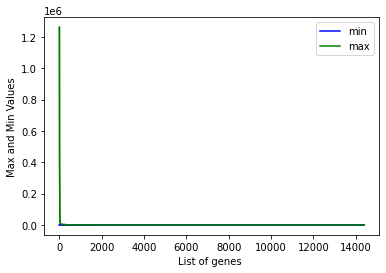

In [16]:
x=list(np.arange(0,14379,1))
l1=plt.plot(x,list(min_list_float_m_sorted_max),'b',label='min')
l2=plt.plot(x,list(max_list_float_m_sorted_max),'g',label='max')
plt.plot(x,min_list_float_m_sorted_max,'b',x,max_list_float_m_sorted_max,'g')
plt.xlabel('List of genes ')
plt.ylabel('Max and Min Values')
plt.legend()
plt.savefig("MAx_min_all.jpg")
plt.show()

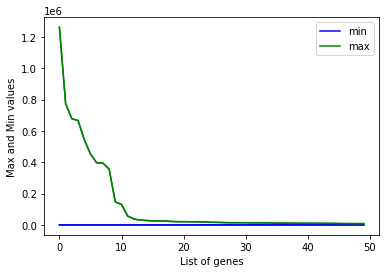

In [17]:
x_2=list(np.arange(0,50,1))
top_min_list_float_m=list(min_list_float_m_sorted_max[0:50])
top_max_list_float_m=list(max_list_float_m_sorted_max[0:50])

l1=plt.plot(x_2,list(top_min_list_float_m),'b',label='min')
l2=plt.plot(x_2,list(top_max_list_float_m),'g',label='max')
plt.plot(x_2,top_min_list_float_m,'b',x_2,top_max_list_float_m,'g')
plt.xlabel('List of genes')
plt.ylabel('Max and Min values')
plt.legend()
plt.savefig("top50.png")

plt.show()


In [18]:
##for each gene, median and mean 
mean_list=list(mRNA_244_df.iloc[:-1,:].mean(axis = 1))
median_list=list(mRNA_244_df.iloc[:-1,:].median(axis = 1))

print(len(mean_list))
print(mRNA_244_df.iloc[:-1,:].shape)

14379
(14379, 244)


In [19]:
##list for differences 
diff_list=[]
diff_list=max_list_float_m_sorted_max-min_list_float_m_sorted_max
print(len(diff_list))

14379


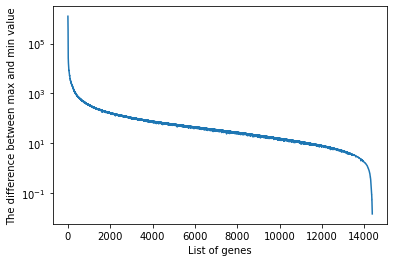

In [21]:
plt.plot(x,diff_list)
plt.yscale('log')
plt.xlabel('List of genes')
plt.ylabel('The difference between max and min value')
plt.savefig("distibution_sensitivity.png")
plt.show()


In [22]:
print(list(top_max_list_float_m))

#print(list(ind_list[0:50]))
ind_231_top_50=[14376, 9585, 10049, 9587, 14378, 14375, 9584, 14377, 9586, 6775, 4974, 6958, 2274, 3444, 11257, 5186, 8165, 9504, 2456, 862, 13541, 12935, 10090, 12942, 8116, 7658, 4176, 12837, 5496, 4116, 3516, 11695, 4499, 11564, 312, 8152, 4844, 4786, 4372, 10473, 4010, 2341, 11799, 7296, 11319, 12483, 6010, 4481, 10446, 5264]
ind_list=list(ind_list)
set(ind_231_top_50)-set(ind_list[0:50])
set(ind_list[0:50])-set(ind_231_top_50)



[1261699.398, 774284.984, 677446.397, 666622.372, 544177.057, 452847.109, 396286.36, 394501.559, 356113.819, 146751.745, 130752.615, 56030.117, 38007.703, 30613.845, 28066.544, 26283.133, 25490.092, 25445.375, 21892.5, 20945.515, 20743.347, 20295.346, 19703.41, 19032.09, 17569.845, 16239.644, 15648.817, 14355.471, 14140.502, 14118.998, 14043.045, 13575.008, 13222.45, 13004.196, 12447.55, 11405.552, 11100.433, 10954.396, 10720.566, 10441.666, 10215.559, 10157.901, 9871.011, 9869.534, 9751.672, 8817.051, 8686.994, 8420.038, 8398.076, 8336.741]


{1000, 7859, 8417}

In [23]:
##sorted by mean

mean_list=np.array(mean_list)
mean_list_ind_list= np.argsort(-mean_list) 
#print(mean_list_ind_list)
mean_list_sorted_mean=sorted(mean_list,reverse = True )


#print(mean_list_ind_list)

In [24]:
print(mean_list_sorted_mean)
print(mean_list)

[34892.973594262294, 27918.536975409836, 18111.581344262293, 17242.484389344267, 16073.609319672118, 14159.236217213107, 14003.341975409832, 11608.521270491803, 8541.159266393444, 2826.173200819672, 2767.8311557377056, 2723.9702540983617, 2684.829090163934, 2364.7034262295088, 2166.7610204918037, 1865.6378688524578, 1771.4713278688525, 1730.355356557376, 1687.230909836067, 1573.4665081967205, 1570.5843729508201, 1551.7135122950817, 1442.809040983606, 1410.3478975409832, 1345.54787704918, 1344.5176803278684, 1268.1068975409842, 1262.6968442622947, 1238.764844262295, 1164.9631885245908, 1107.7528073770495, 1065.3147991803269, 1031.7950819672133, 1017.1892090163935, 977.3262745901636, 956.4089344262289, 949.8006106557377, 933.0142172131145, 899.3020204918038, 882.8834590163935, 875.9201188524589, 871.7038565573769, 866.4803401639342, 845.5233729508195, 813.3056106557377, 806.7028032786882, 797.8905204918041, 758.3344549180329, 728.7008524590163, 697.5998565573769, 696.2662049180328, 686.4

In [25]:
##sorted for min, max median(by means)
min_list_float_m=np.array(min_list_float_m)
min_list_float_m_sort_mean=min_list_float_m[mean_list_ind_list]
print(min_list_float_m_sort_mean)


[0.554 1.331 0.614 ... 0.    0.    0.   ]


In [26]:
max_list_float_m=np.array(max_list_float_m)
max_list_float_m_sort_mean=max_list_float_m[mean_list_ind_list]

In [27]:
median_list=np.array(median_list)
median_list_sort_mean=median_list[mean_list_ind_list]
print(mean_list_sorted_mean)

[34892.973594262294, 27918.536975409836, 18111.581344262293, 17242.484389344267, 16073.609319672118, 14159.236217213107, 14003.341975409832, 11608.521270491803, 8541.159266393444, 2826.173200819672, 2767.8311557377056, 2723.9702540983617, 2684.829090163934, 2364.7034262295088, 2166.7610204918037, 1865.6378688524578, 1771.4713278688525, 1730.355356557376, 1687.230909836067, 1573.4665081967205, 1570.5843729508201, 1551.7135122950817, 1442.809040983606, 1410.3478975409832, 1345.54787704918, 1344.5176803278684, 1268.1068975409842, 1262.6968442622947, 1238.764844262295, 1164.9631885245908, 1107.7528073770495, 1065.3147991803269, 1031.7950819672133, 1017.1892090163935, 977.3262745901636, 956.4089344262289, 949.8006106557377, 933.0142172131145, 899.3020204918038, 882.8834590163935, 875.9201188524589, 871.7038565573769, 866.4803401639342, 845.5233729508195, 813.3056106557377, 806.7028032786882, 797.8905204918041, 758.3344549180329, 728.7008524590163, 697.5998565573769, 696.2662049180328, 686.4

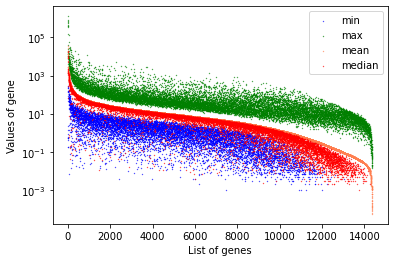

In [31]:
###Maximum, mean, median and minimum gene expression:

fig = plt.figure()
ax = plt.subplot()
ax.scatter(x, list(min_list_float_m_sort_mean),s=0.1 ,c='b',alpha=1,label="min")
ax.scatter(x, list(max_list_float_m_sort_mean),s=0.1 ,c='green', alpha=1,label="max")  # 改变颜色
ax.scatter(x, mean_list_sorted_mean ,s=0.1 ,c='coral' , alpha=1,label="mean")
ax.scatter(x, median_list_sort_mean ,s=0.1 ,c='r' , alpha=1,label="median")
plt.yscale('log')

plt.xlabel('List of genes')
plt.ylabel('Values of gene')
plt.legend()
plt.savefig("sensitivity_mean_median.png")

plt.show()


In [29]:

def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom

(244, 14380)
14379
(14379, 100)


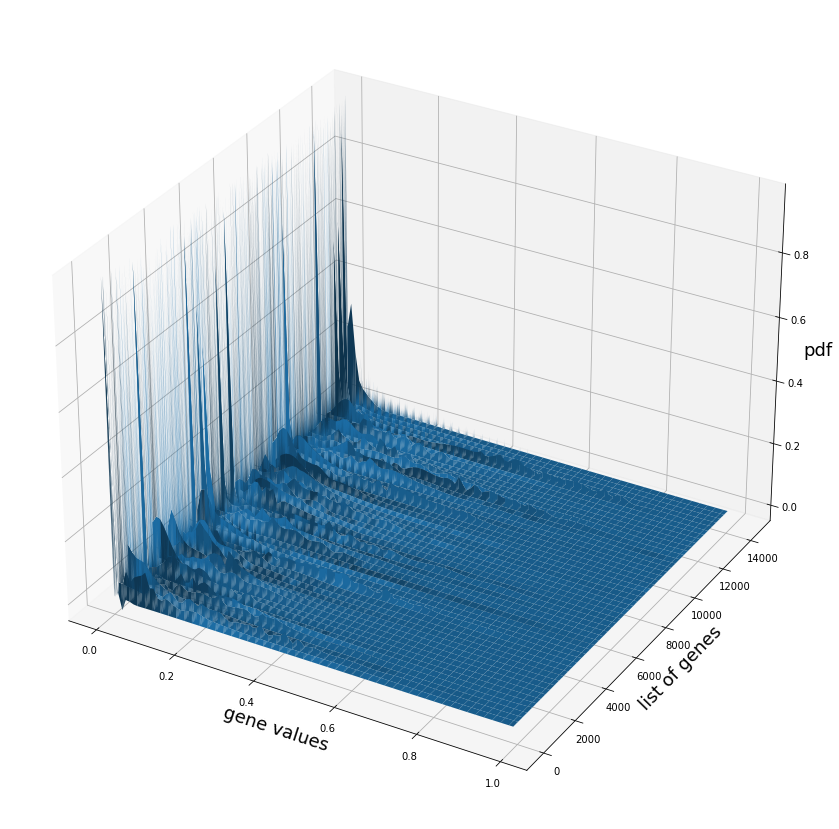

In [30]:
####3dplot
'''
in this section, we plot a 3d map to visualise the gene value distribution among patients.
'''


def linear_scale_genes(patient):
    patient_np = np.copy(patient)
    patient_np = np.floor(scale(patient_np, 0, 100))
    patient_np = np.multiply(patient_np, 0.01)+0.001
    gene_values = patient_np.flatten()
    gene_values.sort()
    return gene_values
"""plot a 3d map to visualise the gene value distribution among patients.
   patient_np, norm = 'range' or 'log'
"""
def plot_normed_3d_gene_value_distr(patient_np, norm):

    ll = [] # length of 14379, shape: 14379,231. for each row, 231 values are normed into [0,1]
    for i in range(14379):
        genes_np =np.copy(patient_np[:,i:i+1])
        normed = None
        if norm == 'linear_scale_and_bin':
            normed = linear_scale_genes(genes_np)
        if norm == 'scale_bin_then_log':
            normed = np.log10(linear_scale_genes(genes_np))
            normed = linear_scale_genes(genes_np)
        else:
            
            normed = genes_np + 0.0000001
        ll.append(normed)
        
    print(len(ll))

    values = []  # values shape (14379, 100) each gene's 231 values are bined into 100 parts
    for each_row in ll:
        n = 100
        normed_val = np.copy(each_row)
        normed_val = normed_val.flatten()

        s = np.asarray(normed_val)   # generate your data sample with N elements
        p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
        x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
        f = UnivariateSpline(x, p, s=n)
        y = f(x)/len(normed_val)
        values.append(y)
    values = np.array(values)
    print(values.shape)

    %matplotlib inline

    #x = np.log10(np.arange(0.01,1.01,0.01))
    x = np.arange(0,1,0.01)
    y = np.arange(0,14379,1)
    X,Y = np.meshgrid(x,y)

    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111, projection='3d')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
#     plt.xscale('log')#///
#     ax.xaxis._set_scale('log')
#     ax.xaxis.set_scale('log')
    ax.set_xlabel('gene values', size =18)
    ax.set_ylabel('list of genes', size = 18)
    ax.set_zlabel('pdf', size = 18)
    # Plot a 3D surface
    ax.plot_surface(X, Y, values)
    plt.savefig('3D_244.jpg')

    plt.show()
 # prepare patient_np (231, 14379)
#mRNA_231_df=pd.read_csv(mRNA_231_file)

#mRNA_231_df = mRNA_231_df.set_index('Hugo_ID')
patient_mRNA = []
for column in mRNA_244_df:
    patient_mRNA.append(mRNA_244_df[column].tolist())

patient_np = np.asarray(patient_mRNA) 
print(patient_np.shape)

norm = 'linear_scale_and_bin' # norm = 'linear_scale_and_bin' or 'log_scale_and_bin'
plot_normed_3d_gene_value_distr(patient_np, norm)   


In [31]:
print(patient_np.shape)
print(len(patient_mRNA))

(244, 14380)
244


In [32]:
##pdf of coerrlation remove Tm rank(a row)
##correlation 
correlations=np.corrcoef(patient_np[:,:-1])
correlations=np.round(correlations, 2) 
print(correlations)
correlations_non_overlap=np.triu(correlations)
print(correlations_non_overlap)
correlations_non_overlap=correlations_non_overlap-np.diag(np.diag(correlations_non_overlap))
print(correlations_non_overlap)


##remove 0 and have a list
correlations_non_overlap = correlations_non_overlap[correlations_non_overlap != 0.]
print(correlations_non_overlap)

[[1.   0.81 0.72 ... 0.81 0.58 0.75]
 [0.81 1.   0.94 ... 0.94 0.9  0.84]
 [0.72 0.94 1.   ... 0.87 0.89 0.73]
 ...
 [0.81 0.94 0.87 ... 1.   0.86 0.86]
 [0.58 0.9  0.89 ... 0.86 1.   0.76]
 [0.75 0.84 0.73 ... 0.86 0.76 1.  ]]
[[1.   0.81 0.72 ... 0.81 0.58 0.75]
 [0.   1.   0.94 ... 0.94 0.9  0.84]
 [0.   0.   1.   ... 0.87 0.89 0.73]
 ...
 [0.   0.   0.   ... 1.   0.86 0.86]
 [0.   0.   0.   ... 0.   1.   0.76]
 [0.   0.   0.   ... 0.   0.   1.  ]]
[[0.   0.81 0.72 ... 0.81 0.58 0.75]
 [0.   0.   0.94 ... 0.94 0.9  0.84]
 [0.   0.   0.   ... 0.87 0.89 0.73]
 ...
 [0.   0.   0.   ... 0.   0.86 0.86]
 [0.   0.   0.   ... 0.   0.   0.76]
 [0.   0.   0.   ... 0.   0.   0.  ]]
[0.81 0.72 0.88 ... 0.86 0.86 0.76]


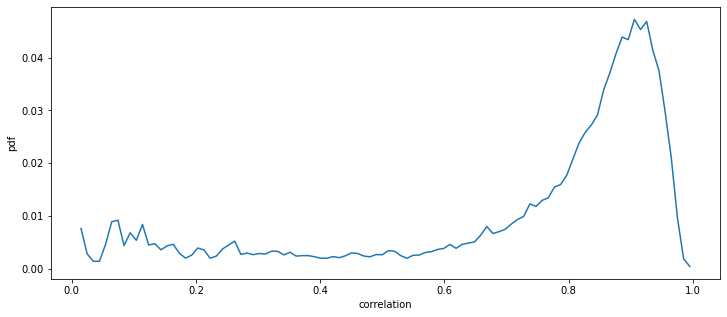

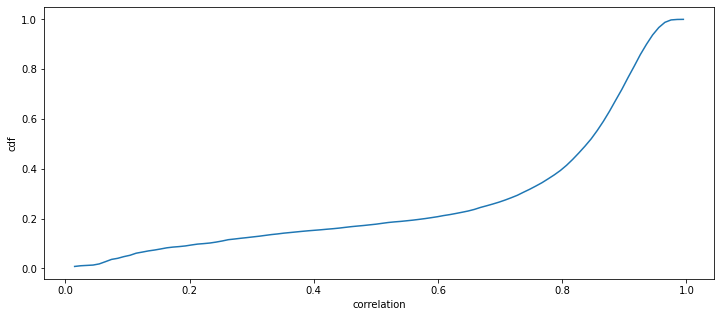

In [33]:
N = 1000
n = N//10
a = np.asarray(correlations_non_overlap)   # generate your data sample with N elements
p, x = np.histogram(a, bins=n) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p,s=n )#,ext=0
y = f(x)/len(correlations_non_overlap)

cdfy = np.cumsum(y)

plt.figure(figsize=(12,5))
plt.xlabel('correlation')
plt.ylabel('pdf')
plt.plot(x,y)
plt.savefig('correlation_pdf.png')

plt.show()


plt.figure(figsize=(12,5))
plt.xlabel('correlation')
plt.ylabel('cdf')
plt.plot(x, cdfy)
plt.savefig('correlation_cdf.png')

plt.show()


In [34]:
r = np.corrcoef(patient_np, patient_np)
correlation_matrix = r[0:117,0:117] 
print(correlation_matrix)
correlation_matrix.mean()

[[1.         0.81078371 0.72037865 ... 0.60270359 0.76445884 0.75725029]
 [0.81078371 1.         0.94306473 ... 0.74373124 0.91442312 0.89313774]
 [0.72037865 0.94306473 1.         ... 0.63406146 0.80467914 0.78950009]
 ...
 [0.60270359 0.74373124 0.63406146 ... 1.         0.86125855 0.78994742]
 [0.76445884 0.91442312 0.80467914 ... 0.86125855 1.         0.90391984]
 [0.75725029 0.89313774 0.78950009 ... 0.78994742 0.90391984 1.        ]]


0.8173312345453941

In [35]:
##table 5.1 person coeficnet  cancer (Mean value for within type and between type)
total_corrcoef_matrix=np.corrcoef(patient_np)
print(total_corrcoef_matrix)
print(total_corrcoef_matrix.shape)
###right triangle 
total_corrcoef_non_overlap=np.triu(total_corrcoef_matrix,0)
##diagonal to 0 

total_corrcoef_non_overlap=total_corrcoef_non_overlap-np.diag(np.diag(total_corrcoef_non_overlap));

sum_total_corrcoef=total_corrcoef_non_overlap.sum()
print(sum_total_corrcoef)
print(total_corrcoef_non_overlap)




##right triangle: number of item（n-1）*n/2 
total_num=244*243/2
##overall average 
print('mean of coeff of total ',sum_total_corrcoef/total_num)

[[1.         0.81078371 0.72037865 ... 0.80861939 0.58200051 0.74501505]
 [0.81078371 1.         0.94306473 ... 0.93958825 0.89555728 0.83935078]
 [0.72037865 0.94306473 1.         ... 0.86746439 0.89454173 0.73081002]
 ...
 [0.80861939 0.93958825 0.86746439 ... 1.         0.85952667 0.85888978]
 [0.58200051 0.89555728 0.89454173 ... 0.85952667 1.         0.75970792]
 [0.74501505 0.83935078 0.73081002 ... 0.85888978 0.75970792 1.        ]]
(244, 244)
21760.02649096387
[[0.         0.81078371 0.72037865 ... 0.80861939 0.58200051 0.74501505]
 [0.         0.         0.94306473 ... 0.93958825 0.89555728 0.83935078]
 [0.         0.         0.         ... 0.86746439 0.89454173 0.73081002]
 ...
 [0.         0.         0.         ... 0.         0.85952667 0.85888978]
 [0.         0.         0.         ... 0.         0.         0.75970792]
 [0.         0.         0.         ... 0.         0.         0.        ]]
mean of coeff of total  0.7339953616327286


In [36]:
patient_np[:,-1]
print(np.shape(patient_np[:,:-1]))

(244, 14379)


In [37]:
total_corrcoef_matrix=np.corrcoef(patient_np[:,:-1])
print(total_corrcoef_matrix)
print(total_corrcoef_matrix.shape)
total_corrcoef_non_overlap=np.triu(total_corrcoef_matrix)

total_corrcoef_non_overlap=total_corrcoef_non_overlap-np.diag(np.diag(total_corrcoef_non_overlap));
sum_total_corrcoef=total_corrcoef_non_overlap.sum()
print(sum_total_corrcoef)

total_num=244*243/2
print('mean of coeff of total ',sum_total_corrcoef/total_num)
#LN 0-117, Bone 117-191, Liver 191-231
##LN 1-117 
LN_corrcoef_matrix=total_corrcoef_matrix[:117,:117]
LN_corrcoef_non_overlap=np.triu(LN_corrcoef_matrix)

LN_corrcoef_non_overlap=LN_corrcoef_non_overlap-np.diag(np.diag(LN_corrcoef_non_overlap));

sum_LN_corrcoef=LN_corrcoef_non_overlap.sum()
LN_num=117*116/2
print('mean of coeff of LN ',sum_LN_corrcoef/LN_num)
##Bone 117-191,
Bone_corrcoef_matrix=total_corrcoef_matrix[117:191,117:191]
Bone_corrcoef_non_overlap=np.triu(Bone_corrcoef_matrix)
Bone_corrcoef_non_overlap=Bone_corrcoef_non_overlap-np.diag(np.diag(Bone_corrcoef_non_overlap));

sum_Bone_corrcoef=Bone_corrcoef_non_overlap.sum()
Bone_num= 74*73/2
print('mean of coeff of Bone ',sum_Bone_corrcoef/Bone_num)
##Liver 191-231
Liver_corrcoef_matrix=total_corrcoef_matrix[191:231,191:231]
Liver_corrcoef_non_overlap=np.triu(Liver_corrcoef_matrix)
Liver_corrcoef_non_overlap=Liver_corrcoef_non_overlap-np.diag(np.diag(Liver_corrcoef_non_overlap));

sum_Liver_corrcoef=Liver_corrcoef_non_overlap.sum()
Liver_num= 40*39/2
print('mean of coeff of Liver ',sum_Liver_corrcoef/Liver_num)
##Prostate 231:238 7
Prostate_corrcoef_matrix=total_corrcoef_matrix[231:238,231:238]
Prostate_corrcoef_non_overlap=np.triu(Prostate_corrcoef_matrix)
Prostate_corrcoef_non_overlap=Prostate_corrcoef_non_overlap-np.diag(np.diag(Prostate_corrcoef_non_overlap));
sum_Prostate_corrcoef=Prostate_corrcoef_non_overlap.sum()
Prostate_num= 7*6/2
print('mean of coeff of Prostate ',sum_Prostate_corrcoef/Prostate_num)
##Lung 6 238: 
Lung_corrcoef_matrix=total_corrcoef_matrix[238:,238:]
Lung_corrcoef_non_overlap=np.triu(Lung_corrcoef_matrix)
Lung_corrcoef_non_overlap=Lung_corrcoef_non_overlap-np.diag(np.diag(Lung_corrcoef_non_overlap));

sum_Lung_corrcoef=Lung_corrcoef_non_overlap.sum()
Lung_num= 5*6/2
print('mean of coeff of Lung ',sum_Lung_corrcoef/Lung_num)

[[1.         0.81078365 0.72037863 ... 0.80863352 0.58210449 0.7450576 ]
 [0.81078365 1.         0.94306478 ... 0.93960493 0.89571453 0.83939932]
 [0.72037863 0.94306478 1.         ... 0.86747797 0.89469211 0.73084934]
 ...
 [0.80863352 0.93960493 0.86747797 ... 1.         0.8595831  0.85889188]
 [0.58210449 0.89571453 0.89469211 ... 0.8595831  1.         0.75968901]
 [0.7450576  0.83939932 0.73084934 ... 0.85889188 0.75968901 1.        ]]
(244, 244)
21760.288548980476
mean of coeff of total  0.7340042012069242
mean of coeff of LN  0.8157576879664009
mean of coeff of Bone  0.6375272859447639
mean of coeff of Liver  0.8205346101971014
mean of coeff of Prostate  0.7313920812756387
mean of coeff of Lung  0.8326259565281598


In [38]:
####coeff between class 
total_corrcoef_matrix=np.corrcoef(patient_np[:,:-1])
print(total_corrcoef_matrix.shape)
LN_Bone=total_corrcoef_matrix[0:117,117:191].mean()
LN_Liver=total_corrcoef_matrix[0:117,191:231].mean()
Bone_Liver=total_corrcoef_matrix[117:191,191:231].mean()
LN_Prostate=total_corrcoef_matrix[0:117,231:238].mean()
LN_Lung=total_corrcoef_matrix[0:117,238:].mean()
Bone_prostate=total_corrcoef_matrix[117:191,231:238].mean()
Bone_lung=total_corrcoef_matrix[117:191,238:244].mean()
Prostate_Lung=total_corrcoef_matrix[231:238,238:244].mean()
Liver_prostate=total_corrcoef_matrix[191:231,231:238].mean()
Liver_Lung=total_corrcoef_matrix[191:231,238:244].mean()

(244, 244)


In [39]:
print('LN_Bone',LN_Bone)
print('LN_Liver',LN_Liver)
print('Bone_Liver',Bone_Liver)
print('LN_Prostate', LN_Prostate)
print('LN_Lung',LN_Lung)
print('Bone_prostate',Bone_prostate)
print('Bone_lung',Bone_lung)
print('Prostate_Lung',Prostate_Lung)
print('Liver_prostate',Liver_prostate)
print('Liver_Lung',Liver_Lung)

LN_Bone 0.6729824939123312
LN_Liver 0.8021482254569398
Bone_Liver 0.6657255150378806
LN_Prostate 0.7786346606727738
LN_Lung 0.8141251638410794
Bone_prostate 0.6407373761645845
Bone_lung 0.6695980425511217
Prostate_Lung 0.7846937064257679
Liver_prostate 0.7745453407944607
Liver_Lung 0.8133143050247104


In [207]:
####heatmap 
# Pearson coefficient  sorted in descending order of their mean coefficient value within the group.

#step1 sorted in descending order of their mean coefficient value within the group. 

''''   
def sort_within_each_cancer(correlation_matrix):
    corr_means = correlation_matrix.mean(axis=0)
    ranks = np.argsort(-corr_means)
    correlation_matrix = correlation_matrix[:, ranks][ranks] ###为了让他还是个对称的矩阵
    correlations = correlation_matrix[~np.eye(correlation_matrix.shape[0],dtype=bool)].reshape(correlation_matrix.shape[0],-1)
    ##行数固定
    corr_means = correlations.mean(axis=0)
    ##删掉1 之后的mean 
    print(corr_means.shape)
    return correlation_matrix, corr_means
'''  

def sort_within_each_cancer(patient_np, norm = ''):
    if norm == 'rank_and_scale': 
        x = patient_np.T ##14379*244
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        patient_np =  min_max_scaler.fit_transform(x.T) ##244*14379 
    
    
    
    if norm == 'scale_and_bin':
        patient_np = np.floor(scale(patient_np, 0, 100))
    r = np.corrcoef(patient_np, patient_np)
    correlation_matrix = r[0:117, 0:117] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)
    # x = dict(zip(corr_means, range(0,117)))
    # print(x)
    ranks = np.argsort(-corr_means)
    # print(ranks)
    correlation_matrix = r[117:191, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t= np.argsort(-corr_means) + 117
    ranks = np.concatenate([ranks, ranks_t]) 
    # print(ranks)
    correlation_matrix = r[191:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 191
    ranks = np.concatenate([ranks, ranks_t]) 
    
    correlation_matrix = r[231:238, 231:238] 
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 231
    ranks = np.concatenate([ranks, ranks_t]) 
    
    correlation_matrix = r[238:244, 238:244] 
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 238
    ranks = np.concatenate([ranks, ranks_t]) 
    
    
    
    
    
    
    
    

    correlation_matrix = r[0:244, 0:244]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    # print(correlation_matrix)
    # pd.DataFrame(correlation_matrix).to_csv('C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\temp.csv')
    return correlation_matrix


sort_within_each_cancer_corr_matrix=sort_within_each_cancer(patient_np[:,:-1])
##step2 heatmap
def plot_heatmap(correlation_matrix):
    f = plt.figure(figsize=(20,20))
    
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    plt.plot([117, 117], [0, 244], 'yellow')
    plt.plot([0, 244], [117, 117], 'yellow')
    plt.plot([191, 191], [0, 244], 'yellow')
    plt.plot([0, 244], [191, 191], 'yellow')
    plt.plot([231, 231], [0, 244], 'yellow')
    plt.plot([0, 244], [231, 231], 'yellow')
    plt.plot([238, 238], [0, 244], 'yellow')
    plt.plot([0, 244], [238, 238], 'yellow')
    
    plt.text(111, -1.5, 'LN-Bone', fontsize=15)
    plt.text(-6, 126, 'Bone-LN', rotation = 90, fontsize=15)
    plt.text(180, -1.5, 'Bone-Liver', fontsize=15)
    plt.text(-6,200, 'Liver-Bone', rotation = 90, fontsize=15)
    
    plt.text(220, -1.5, 'Liver-Pro.', fontsize=15)
    plt.text(-6,233, 'Pro.-Liver', rotation = 90, fontsize=15)
    plt.text(238, -1.5, 'Pro.-Lung', fontsize=15)
    plt.text(-6,250, 'Lung-Pro.', rotation = 90, fontsize=15)
    img = plt.imshow(correlation_matrix, cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

    ax = plt.subplot(111)
    divider = make_axes_locatable(ax)   
    cax = divider.append_axes("right", size="2%", pad=1)

    plt.colorbar(img,cax=cax)
    plt.savefig('heatmap_244_before_filter.png')

    plt.show()
 



<ipython-input-175-c691614c36e9>:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


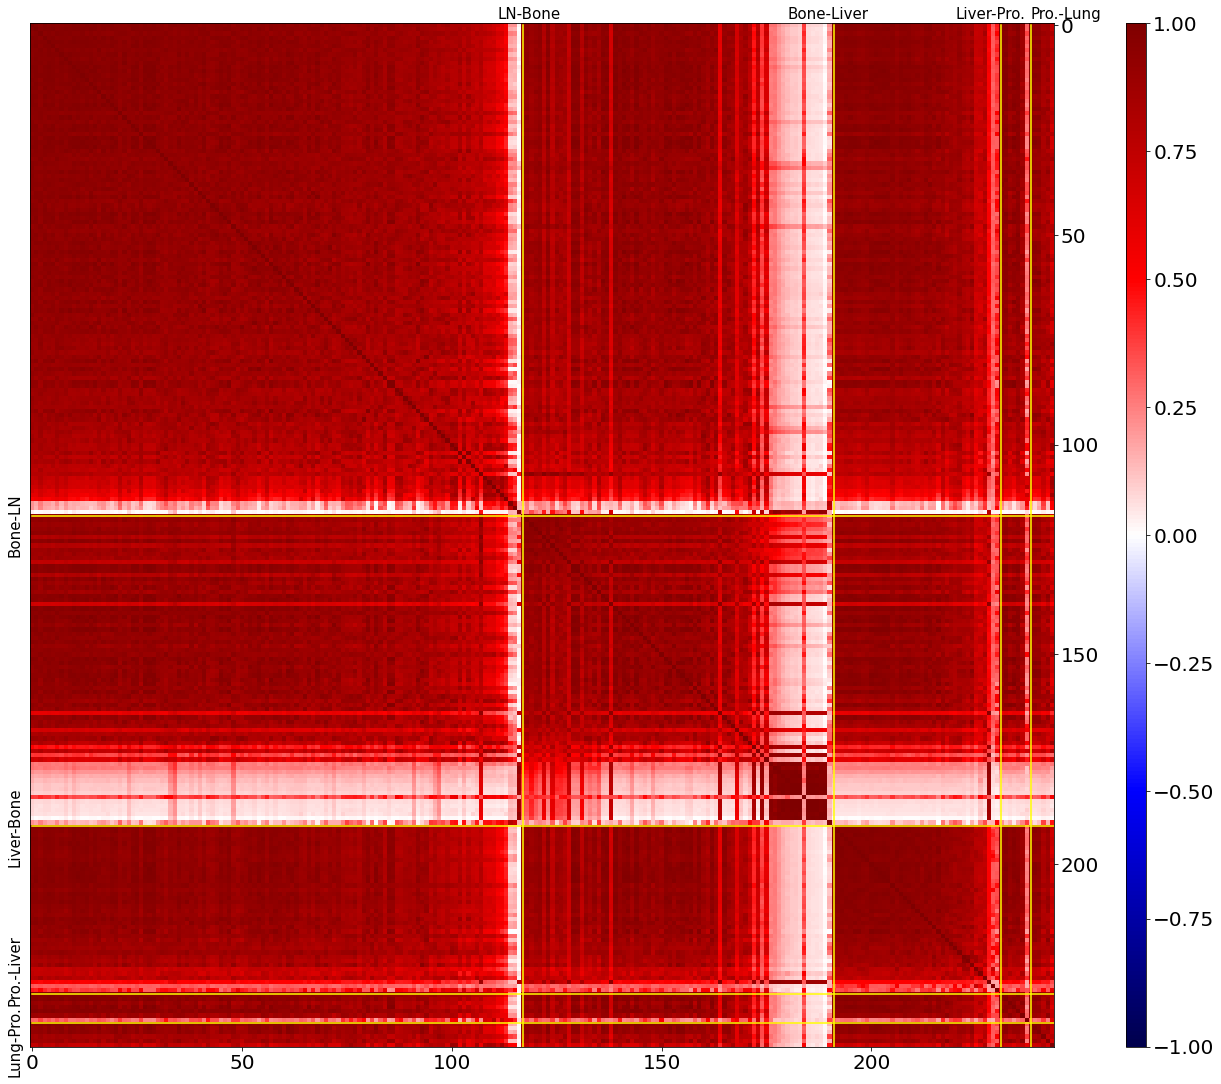

In [176]:
plot_heatmap(sort_within_each_cancer_corr_matrix)

In [42]:
np.shape(patient_np)

(244, 14380)

In [43]:
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom
    
    

In [44]:
mRNA_np = np.asarray(patient_np[:,:-1])
(len(mRNA_np.T))

14379

In [45]:
LN_m = [1]*117+(244-117)*[0]
test=mRNA_np[:,0]
test_corr=np.corrcoef(LN_m, test)
print(test_corr[1,0])
np.arange(len(mRNA_np))

0.06693441784052159


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
def plot_each_gene_correlation_with_each_mask(norm):
    (p_start, p_end) = (0,244)
    
    mRNA_np = np.asarray(patient_np[:,:-1])
    '''
    if norm == 'rank_and_scale': 
        x = mRNA_np.T
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np = scale(x.T,0,100)  ##整个数据里面的min max 是0 100 吗 
    '''    
        
    mRNA_np = mRNA_np.T
    
    print(len(mRNA_np))
    LN_c = []
    Bone_c = []
    Liver_c = []
    prostate_c=[]
    Lung_c=[]
    LN_m = [1]*117+(244-117)*[0]
    Bone_m = [0]*117+74*[1]+(40+13)*[0]
    Liver_m = [0]*191+(40)*[1]+[0]*13
    prostate_m=[0]*231+[1]*7+[0]*6
    Lung_m=[0]*238+[1]*6
    orders_list = [] #3d list (5, 14379), stores order of indexs sorted by Ln,Bone and Liver
    
    
    for i in range(len(mRNA_np)): ##14379
        each = mRNA_np[i]
        corr = np.corrcoef(LN_m, each)[1,0]
        LN_c.append(corr)
        corr = np.corrcoef(Bone_m, each)[1,0]
        Bone_c.append(corr)
        corr = np.corrcoef(Liver_m, each)[1,0]
        Liver_c.append(corr)
        corr = np.corrcoef(prostate_m, each)[1,0]
        prostate_c.append(corr)
        corr = np.corrcoef(Lung_m, each)[1,0]
        Lung_c.append(corr)
        
        
        
        
        
#         mask_corr.append(corr)
    indexs = np.arange(len(mRNA_np)) ##14379
    masks_corr_df = pd.DataFrame({"ind": indexs, "LN": LN_c, "Bone": Bone_c, "Liver":Liver_c,
                                  "Prostate":prostate_c,"Lung":Lung_c})
    masks_corr_df = masks_corr_df.sort_values(['LN'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    Prostate_sort=masks_corr_df['Prostate'].to_numpy()
    Lung_sort=masks_corr_df['Lung'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Prostate_sort, label='with Prostate mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Lung_sort, label='with Lung mask',s=1)

    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.savefig('metastases masks_LN.jpg')

    plt.show()
    
    
    masks_corr_df = masks_corr_df.sort_values(['Bone'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    Prostate_sort=masks_corr_df['Prostate'].to_numpy()
    Lung_sort=masks_corr_df['Lung'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Prostate_sort, label='with Prostate mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Lung_sort, label='with Lung mask',s=1)

    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.savefig('metastases masks_Bone.jpg')

    plt.show()

    masks_corr_df = masks_corr_df.sort_values(['Liver'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    Prostate_sort=masks_corr_df['Prostate'].to_numpy()
    Lung_sort=masks_corr_df['Lung'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Prostate_sort, label='with Prostate mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Lung_sort, label='with Lung mask',s=1)

    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.savefig('metastases masks_Liver.jpg')

    plt.show()
    
    masks_corr_df = masks_corr_df.sort_values(['Prostate'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    Prostate_sort=masks_corr_df['Prostate'].to_numpy()
    Lung_sort=masks_corr_df['Lung'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Prostate_sort, label='with Prostate mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Lung_sort, label='with Lung mask',s=1)

    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.savefig('metastases masks_Prostate.jpg')

    plt.show()
    
    masks_corr_df = masks_corr_df.sort_values(['Lung'], ascending=[False])
    LN_sort = masks_corr_df['LN'].to_numpy()
    Bone_sort = masks_corr_df['Bone'].to_numpy()
    Liver_sort = masks_corr_df['Liver'].to_numpy()
    Prostate_sort=masks_corr_df['Prostate'].to_numpy()
    Lung_sort=masks_corr_df['Lung'].to_numpy()
    orders_list.append(masks_corr_df['ind'].to_numpy())
    
    plt.figure(figsize=(15,9))
    plt.rc('ytick',labelsize=14)
    plt.rc('xtick',labelsize=14)
    plt.scatter(list(range(len(LN_sort))), LN_sort, label='with LN mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Bone_sort, label='with Bone mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Liver_sort, label='with Liver mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Prostate_sort, label='with Prostate mask',s=1)
    plt.scatter(list(range(len(LN_sort))),Lung_sort, label='with Lung mask',s=1)

    plt.legend(loc='upper center', markerscale=5, fontsize=12, framealpha=0.5)
    plt.ylabel('correlation coefficients', fontsize=18)
    plt.xlabel('list of gene', fontsize=18)
    plt.savefig('metastases masks_Lung.jpg')

    plt.show()
    
    
    
    
    
    
    return orders_list






14379


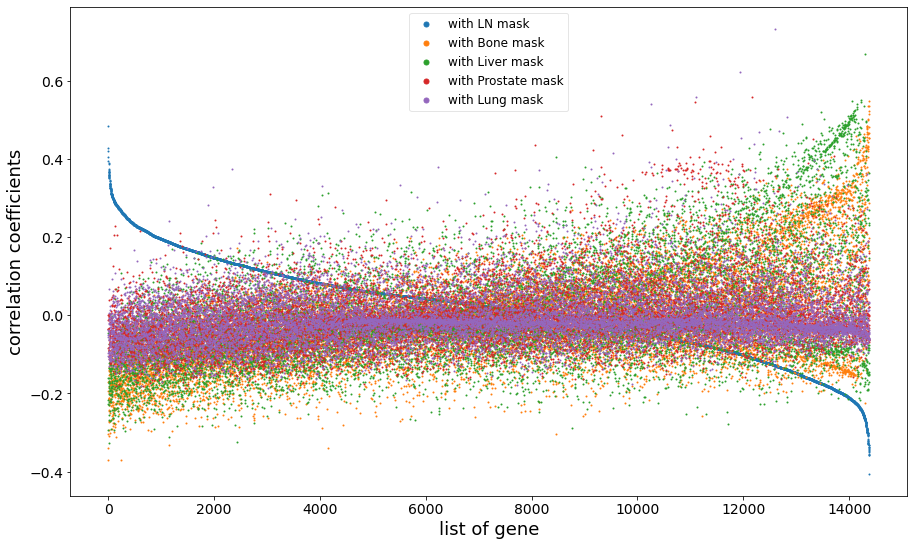

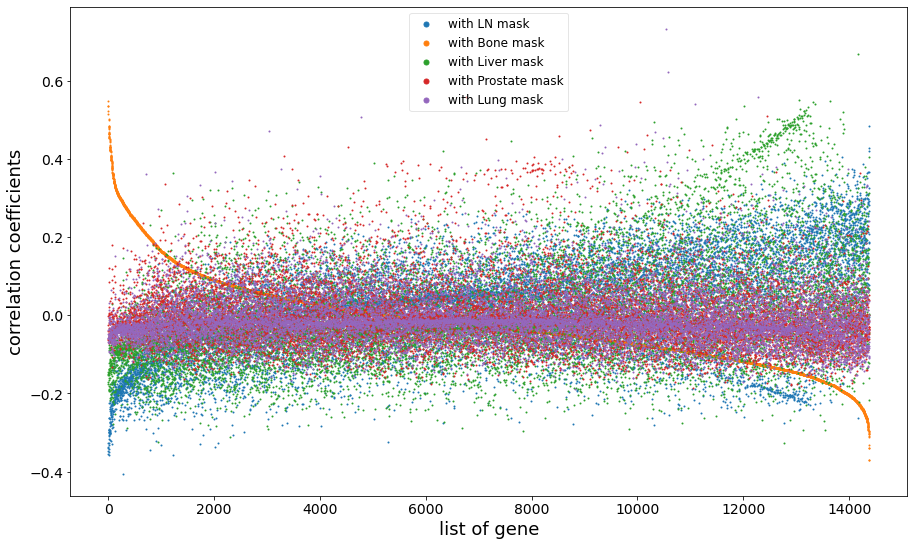

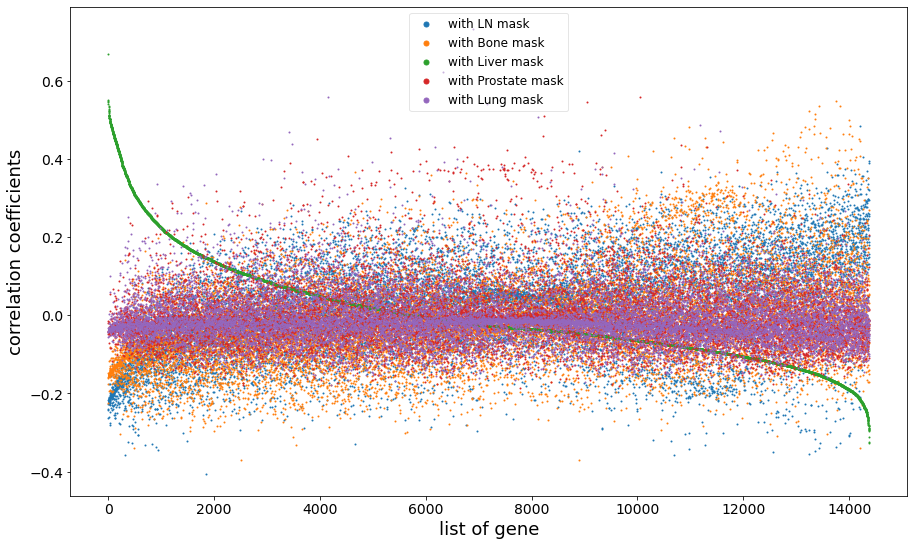

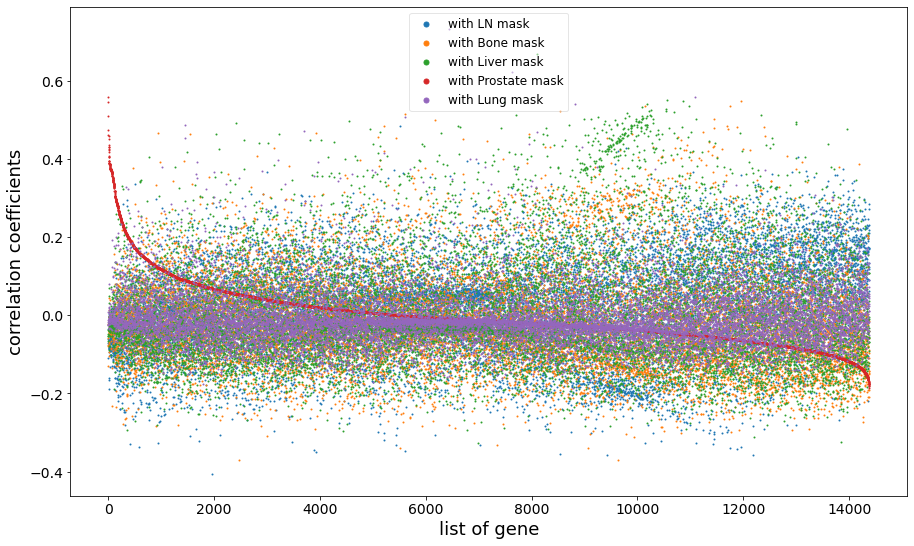

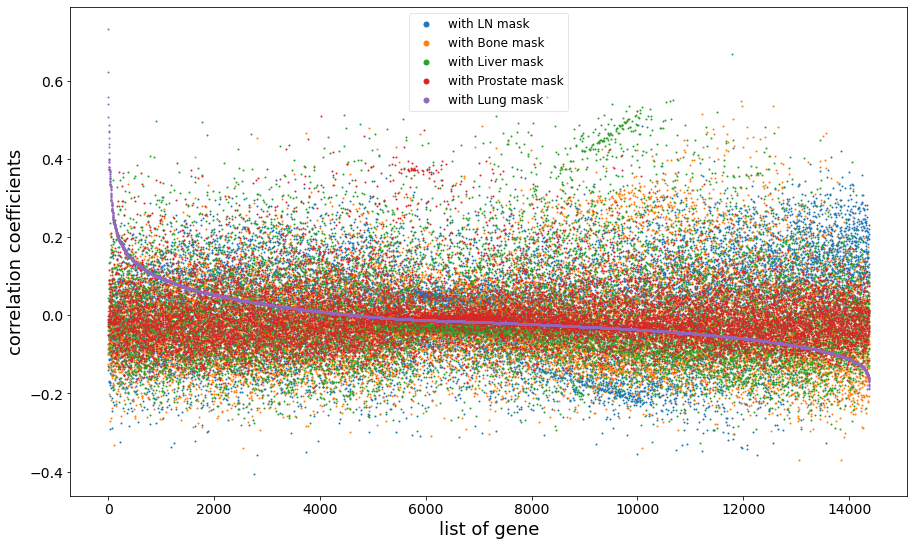

In [47]:
norm = ""
orders_list = plot_each_gene_correlation_with_each_mask(norm)

In [55]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
###scale 可以直接调 MinMaxScaler
##x_minmax = min_max_scaler.fit_transform(x)


In [50]:
from scipy.special import logit as logit


In [77]:
mRNA_np = np.asarray(patient_np[:,:-1])
#mRNA_np =  min_max_scaler.fit_transform(mRNA_np)
print(mRNA_np.shape)
print(mRNA_np[5,:])

(244, 14379)
[0.0000000e+00 5.0810000e+00 3.9280000e+00 ... 3.0961998e+04 9.9643460e+03
 1.1156301e+04]


In [78]:
x = mRNA_np.T ##14379*244
def rd(x):
    return  (rankdata(x, method='dense') - 1).astype(int)
x = np.apply_along_axis(rd, 1, x)
mRNA_np_out =  min_max_scaler.fit_transform(x.T) ##244*14379 
print(mRNA_np_out)

[[0.         0.93248945 0.9625     ... 0.16872428 0.51851852 0.82716049]
 [0.         0.28691983 0.2875     ... 0.58436214 0.32510288 0.55555556]
 [0.         0.00421941 0.01666667 ... 0.96296296 0.79012346 0.84773663]
 ...
 [0.         0.44303797 0.04583333 ... 0.57201646 0.51440329 0.59670782]
 [0.         0.56962025 0.92916667 ... 0.19753086 0.09465021 0.06584362]
 [0.         0.3164557  0.1        ... 0.1563786  0.30864198 0.20576132]]


In [295]:
"""
given mask, threshold, norm scheme,
returns np.array(mask_corr) correlations of all genes with the mask, 
        np.array(good_mRNA) selected mRNAs shape: (n*231), 
        the_corr correlations of selected mRNAs with the mask
        干了三件事 
        1 mask_corr 计算了correlation with the gene 
        2 good_mRNA 选出来的gene (n*231)
        3 the_corr是选出来的gene 和mask 的correlations 
"""
##mask and genes corr
def correlation_with_mask(mask, threshold, norm):
    #(p_start, p_end) = (0,244)
    mRNA_np = np.asarray(patient_np[:,:-1])  ##(244, 14379)
    
    if norm == 'linear_scale_and_bin':
        mRNA_np =  min_max_scaler.fit_transform(mRNA_np)
        #np.floor(scale(mRNA_np, 0, 100)) ##why use  100 as the max
        ##we need gene expression values to [0,1] ?????.
        
    if norm == 'log_scale_and_bin':
        mRNA_np = np.log10(mRNA_np+0.0000001) 
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        
    if norm == 'rank_and_scale': 
        x = mRNA_np.T ##14379*244
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np =  min_max_scaler.fit_transform(x.T) ##244*14379 
        #scale(x.T,0,100)
    
    if norm == 'logit_origin': #logit-normalisation on the original binned values 
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        mRNA_np = logit(mRNA_np)
        
    if norm == 'logit_log': #logit-normalisation on the log binned values 
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        mRNA_np = logit(mRNA_np)
        
        
        
    mRNA_np = mRNA_np.T ##14379* 244
    
    mask_corr = []  # correlations of all genes with the mask
    good_mRNA = []  # selected mRNAs shape: (n*231)
    the_corr = []   # correlations of selected mRNAs with the mask
    mRNA_index = []
    
    
    for i in range(len(mRNA_np)): ##14379  *244
        each = mRNA_np[i]
        corr = np.corrcoef(mask, each)[1,0]
        if corr > threshold or corr<-threshold:
#             print(i, corr)
            good_mRNA.append(each)
            mRNA_index.append(i)
            the_corr.append(corr)
        mask_corr.append(corr)
        ##print(mRNA_index)
    return np.array(mask_corr),mRNA_index, np.array(good_mRNA), the_corr
    
    

In [296]:
##test
##test_LN_015=correlation_with_mask(LN_m,0.15,'rank_and_scale')

In [297]:
LN_m = [1]*117+(244-117)*[0]
Bone_m = [0]*117+74*[1]+(40+13)*[0]
Liver_m = [0]*191+(40)*[1]+[0]*13
prostate_m=[0]*231+[1]*7+[0]*6
Lung_m=[0]*238+[1]*6
print(len(LN_m))

244


In [411]:
##intersection and union 
def gene_selected_by_diff_threshold(norm,thresholds,remove_intersect= True):
    '''
    returns union_genes, intersect_genes
    '''
    LN_m = [1]*117+(244-117)*[0]
    Bone_m = [0]*117+74*[1]+(40+13)*[0]
    Liver_m = [0]*191+(40)*[1]+[0]*13
    Prostate_m=[0]*231+[1]*7+[0]*6
    Lung_m=[0]*238+[1]*6
    
    LN_genes = []
    Bone_genes= []
    Liver_genes= []
    Prostate_genes=[]
    Lung_genes=[]
    union_genes = [] # union, 3d np array (a,b,231), a is length of thresholds list, b is number of union selected genes in each threshold.
    intersect_genes = [] # intersect, 4d np array (a, 3, b, 231), a is length of thresholds list, 3 is 3 cancers intersect.
                            #b is number of union selected genes in each threshold.
    intersect_gene_ind =[]
    union_gene_ind = [] 
    genes_remove_intersect = []
    genes_remove_intersect_ind=[]
    
    
    for i in thresholds:
        print('thresholds',i)
        correlations, LNgood_ind, LNgood_mRNA, the_corr = correlation_with_mask(LN_m, i,norm)
        LN_genes.append(LNgood_mRNA)
        print('gene corr with LN', len(LN_genes[-1]))
        correlations,Bonegood_ind, Bonegood_mRNA, the_corr = correlation_with_mask(Bone_m, i,norm)
        Bone_genes.append(Bonegood_mRNA)
        print('gene corr with bone',len( Bone_genes[-1]))
        correlations,Livergood_ind, Livergood_mRNA, the_corr = correlation_with_mask(Liver_m, i,norm)
        Liver_genes.append(Livergood_mRNA)
        print('gene corr with liver',len( Liver_genes[-1]))
        correlations,Prostategood_ind, Prostategood_mRNA, the_corr = correlation_with_mask(Prostate_m, i,norm)
        Prostate_genes.append(Prostategood_mRNA)
        print('gene corr with prostate',len(Prostate_genes[-1]))

        correlations,Lunggood_ind, Lunggood_mRNA, the_corr = correlation_with_mask(Lung_m, i,norm)
        Lung_genes.append(Lunggood_mRNA)
        print('gene corr with lung',len(Lung_genes[-1]))
        
        
        LNset = set([tuple(x) for x in LNgood_mRNA])
        Boneset = set([tuple(x) for x in Bonegood_mRNA])
        Liverset = set([tuple(x) for x in Livergood_mRNA])
        Prostateset=set([tuple(x) for x in Prostategood_mRNA])
        Lungset=set([tuple(x) for x in Lunggood_mRNA])
       
        
        
        
        
        
        ###there are 10 insetsects in pairs of types of cancers 
        LN_Bone_intersect = np.array([x for x in LNset & Boneset])
        LN_Liver_intersect = np.array([x for x in Liverset & LNset])
        LN_Prostate_intersect=  np.array([x for x in LNset & Prostateset])
        LN_Lung_intersect= np.array([x for x in LNset & Lungset])
        Bone_Liver_intersect = np.array([x for x in Boneset & Liverset])
        Bone_Prostate_intersect = np.array([x for x in Boneset & Prostateset])
        Bone_Lung_intersect = np.array([x for x in Boneset & Lungset])
        Liver_Prostate_intersect = np.array([x for x in Liverset & Prostateset])
        Liver_Lung_intersect = np.array([x for x in Liverset & Lungset])
        Prostate_Lung_intersect = np.array([x for x in Prostateset & Lungset])
        
        ##intersect_genes_ind
        #list(set(a).intersection(set(b)))
        LN_Bone_intersect_ind=[set(LNgood_ind).intersection(set(Bonegood_ind))]
        LN_Liver_intersect_ind=[set(LNgood_ind).intersection(set(Livergood_ind))]
        LN_Prostate_intersect_ind=[set(LNgood_ind).intersection(set(Prostategood_ind))]
        LN_Lung_intersect_ind=[set(LNgood_ind).intersection(set(Lunggood_ind))]
        Bone_Liver_intersect_ind=[set(Bonegood_ind).intersection(set(Livergood_ind))]
        Bone_Prostate_intersect_ind = [set(Bonegood_ind).intersection(set(Prostategood_ind))]
        Bone_Lung_intersect_ind=[set(Bonegood_ind).intersection(set(Lunggood_ind))]
        Liver_Prostate_intersect_ind=[set(Livergood_ind).intersection(set(Prostategood_ind))]
        Liver_Lung_intersect_ind=[set(Livergood_ind).intersection(set(Lunggood_ind))]
        Prostate_Lung_intersect_ind=[set(Prostategood_ind).intersection(set(Lunggood_ind))]

        
        
        
        intersect_genes_ind=[]
        intersect_genes_ind.append([LN_Bone_intersect_ind,LN_Liver_intersect_ind,
                                  LN_Prostate_intersect_ind,LN_Lung_intersect_ind,Bone_Liver_intersect_ind
                                  ,Bone_Prostate_intersect_ind,Bone_Lung_intersect_ind,Liver_Prostate_intersect_ind,
                                  Liver_Lung_intersect_ind,Prostate_Lung_intersect])

        

        
        
       
        ##gene
        all_intersect = np.array([x for x in Liverset & LNset & Boneset & Prostateset & Lungset ])
        intersect_genes.append([LN_Bone_intersect, LN_Liver_intersect , LN_Prostate_intersect,LN_Lung_intersect,
                                Bone_Liver_intersect,Bone_Prostate_intersect,Bone_Lung_intersect ,
                                Liver_Prostate_intersect , Liver_Lung_intersect ,
                                Prostate_Lung_intersect,
                                all_intersect])
        all_intersect_set=set([tuple(x) for x in all_intersect])
        ##index
        all_ind_intersect = list(set(LNgood_ind) & set(Bonegood_ind) & set(Livergood_ind) &set(Prostategood_ind) &set(Lunggood_ind))
        #intersect_gene_ind.append(all_ind_intersect)
        ##并集
        ##index
        union_gene_ind=list(set().union(LNgood_ind,Bonegood_ind,Livergood_ind,Prostategood_ind,Lunggood_ind))
        ##gene
        allgood_mRNA = np.concatenate((LNgood_mRNA,Bonegood_mRNA,Livergood_mRNA,Prostategood_mRNA,Lunggood_mRNA), axis=0) 
        allgood_mRNA = np.unique(allgood_mRNA, axis=0) ##axis=0 
        
        ###remove from intersection 
        if remove_intersect:    #still working on it 
            print(allgood_mRNA.shape, LN_Bone_intersect.shape, LN_Liver_intersect.shape,  LN_Prostate_intersect.shape,
                 LN_Lung_intersect.shape,Bone_Liver_intersect.shape,Bone_Prostate_intersect.shape,Bone_Lung_intersect.shape,Liver_Prostate_intersect.shape,
                  Liver_Lung_intersect.shape,Prostate_Lung_intersect.shape,all_intersect.shape)
            genes_remove_intersect.append(np.array([x for x in set([tuple(y) for y in allgood_mRNA]) if x not in all_intersect_set]))
            
            genes_remove_intersect_ind=list(set(union_gene_ind).difference(set(all_ind_intersect)))
            
            
            print(len(genes_remove_intersect[-1]))  
        union_genes.append(allgood_mRNA)
        print(len(genes_remove_intersect_ind)) 
        print(len(union_genes[-1]))

    return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind

    

In [416]:

all_ind_intersect_015,all_intersect_015,genes_remove_intersect_ind_015, genes_remove_intersect_015,union_genes_015, union_gene_ind_015,intersect_genes_015,intersect_genes_ind_015=gene_selected_by_diff_threshold('rank_and_scale',[0.15],remove_intersect= True)
all_ind_intersect_01,all_intersect_01,genes_remove_intersect_ind_01,genes_remove_intersect_01,union_genes_01, union_gene_ind_01,intersect_genes_01,intersect_genes_ind_01=gene_selected_by_diff_threshold('rank_and_scale',[0.1],remove_intersect= True)
all_ind_intersect_02,all_intersect_02,genes_remove_intersect_ind_02,genes_remove_intersect_02,union_genes_02, union_gene_ind_02,intersect_genes_02,intersect_genes_ind_02=gene_selected_by_diff_threshold('rank_and_scale',[0.2],remove_intersect= True)
all_ind_intersect_025,all_intersect_025,genes_remove_intersect_ind_025,genes_remove_intersect_025,union_genes_025, union_gene_ind_025,intersect_genes_025,intersect_genes_ind_025=gene_selected_by_diff_threshold('rank_and_scale',[0.25],remove_intersect= True)
all_ind_intersect_03,all_intersect_03,genes_remove_intersect_ind_03,genes_remove_intersect_03,union_genes_03, union_gene_ind_03,intersect_genes_03,intersect_genes_ind_03=gene_selected_by_diff_threshold('rank_and_scale',[0.3],remove_intersect= True)
all_ind_intersect_035,all_intersect_035,genes_remove_intersect_ind_035,genes_remove_intersect_035,union_genes_035, union_gene_ind_035,intersect_genes_035,intersect_genes_ind_035=gene_selected_by_diff_threshold('rank_and_scale',[0.35],remove_intersect= True)


thresholds 0.15
gene corr with LN 4477
gene corr with bone 3480
gene corr with liver 3885
gene corr with prostate 1247
gene corr with lung 781
(8281, 244) (2022, 244) (1832, 244) (369, 244) (259, 244) (1282, 244) (229, 244) (177, 244) (265, 244) (195, 244) (88, 244) (7, 244)
8274
8274
8281
thresholds 0.1


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 7189
gene corr with bone 6034
gene corr with liver 6325
gene corr with prostate 4052
gene corr with lung 3040
(12211, 244) (3958, 244) (3755, 244) (1986, 244) (1597, 244) (2932, 244) (1532, 244) (1323, 244) (1684, 244) (1260, 244) (790, 244) (88, 244)
12123
12123
12211
thresholds 0.2


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 2606
gene corr with bone 1958
gene corr with liver 2255
gene corr with prostate 315
gene corr with lung 102
(4868, 244) (998, 244) (865, 244) (58, 244) (29, 244) (546, 244) (24, 244) (14, 244) (35, 244) (23, 244) (10, 244) (1, 244)
4867
4867
4868
thresholds 0.25


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 1334
gene corr with bone 1069
gene corr with liver 1268
gene corr with prostate 73
gene corr with lung 27
(2710, 244) (464, 244) (406, 244) (6, 244) (4, 244) (216, 244) (1, 244) (2, 244) (2, 244) (3, 244) (1, 244) (0,)
2710
2710
2710
thresholds 0.3


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 631
gene corr with bone 607
gene corr with liver 739
gene corr with prostate 26
gene corr with lung 10
(1537, 244) (234, 244) (180, 244) (1, 244) (1, 244) (66, 244) (0,) (0,) (0,) (1, 244) (0,) (0,)
1537
1537
1537
thresholds 0.35


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 330
gene corr with bone 377
gene corr with liver 463
gene corr with prostate 3
gene corr with lung 5
(949, 244) (134, 244) (78, 244) (0,) (0,) (19, 244) (0,) (0,) (0,) (0,) (0,) (0,)
949
949
949


<ipython-input-411-9c6a252900be>:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


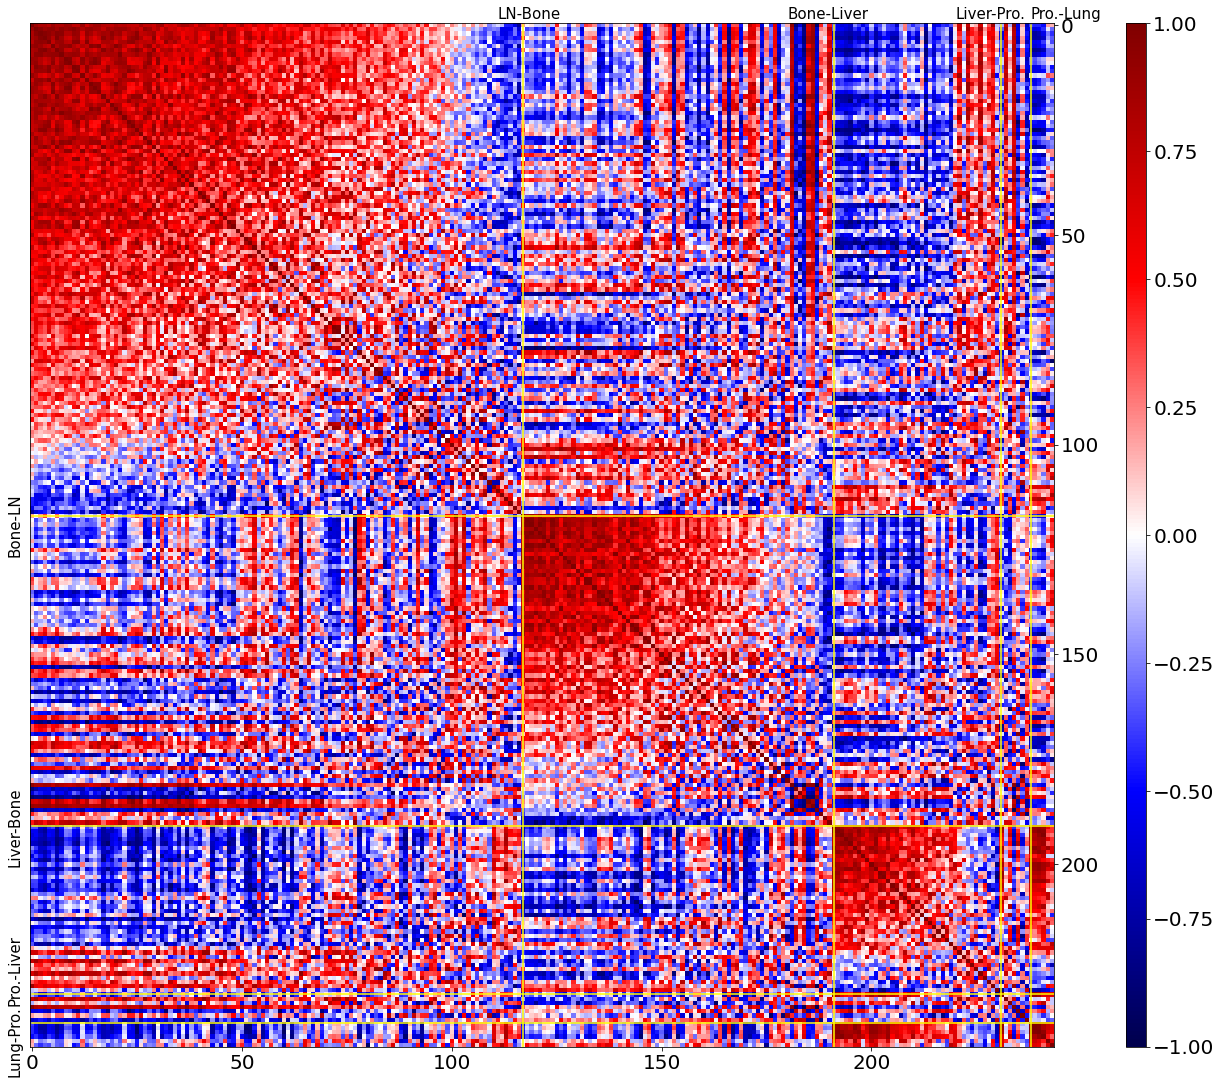

In [302]:
## used all_ind_intersect_015
sort_within_each_cancer_corr_matrix_015=sort_within_each_cancer(patient_np[0:244,all_ind_intersect_015],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix_015)

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


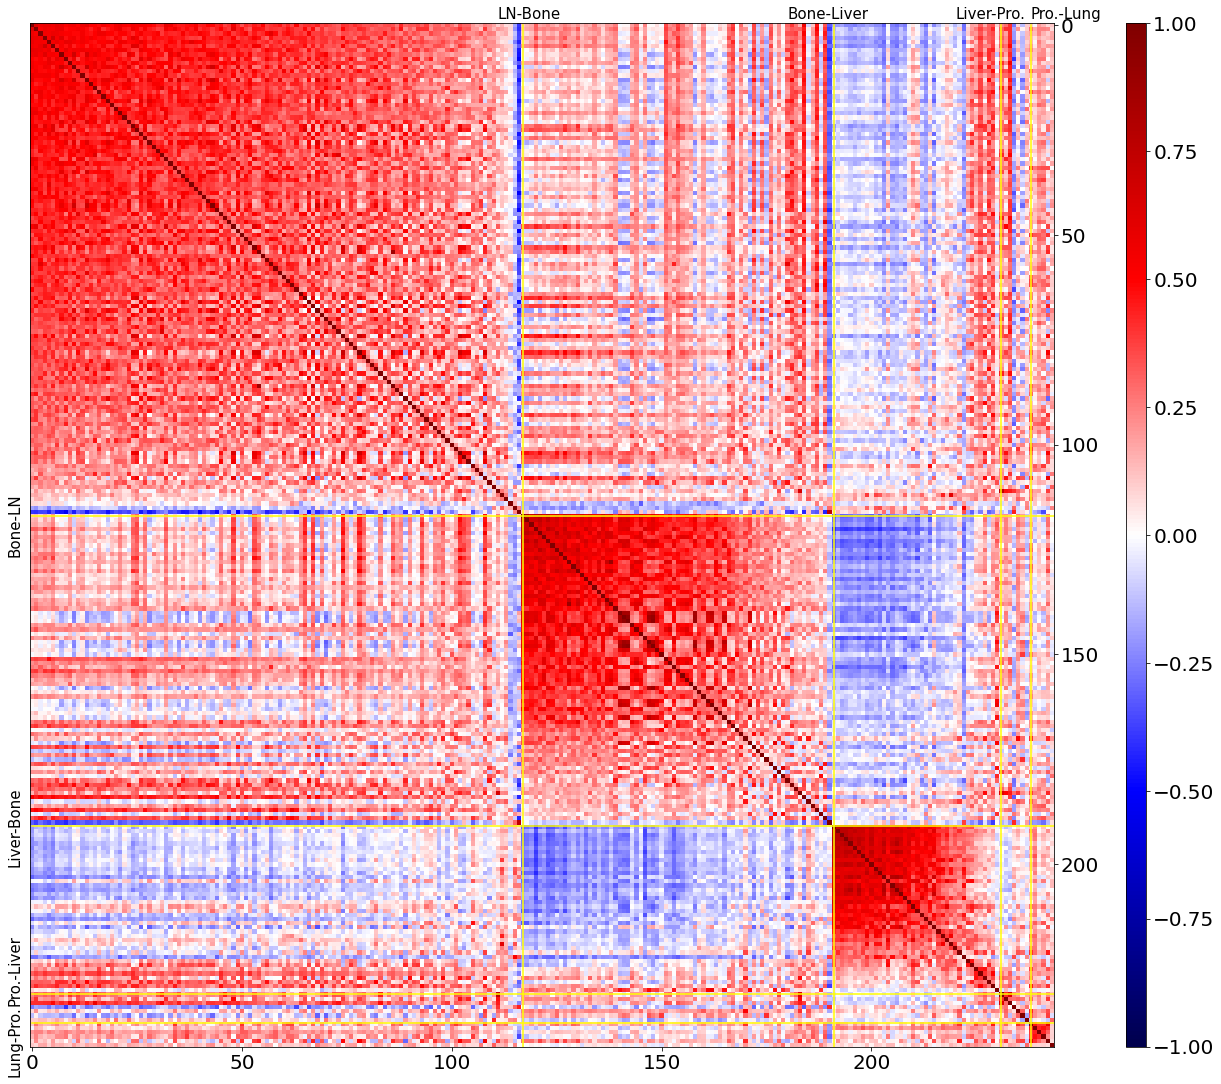

In [417]:
## genes_remove_intersect_ind_0？
sort_within_each_cancer_corr_matrix_015=sort_within_each_cancer(patient_np[0:244,genes_remove_intersect_ind_03],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix_015)


thresholds 0.2
gene corr with LN 2606
gene corr with bone 1958
gene corr with liver 2255
gene corr with prostate 315
gene corr with lung 102
(4868, 244) (998, 244) (865, 244) (58, 244) (29, 244) (546, 244) (24, 244) (14, 244) (35, 244) (23, 244) (10, 244) (1, 244)
2613
1
4868


<ipython-input-358-1c90513bf48f>:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind
/Users/chen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/chen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/chen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact

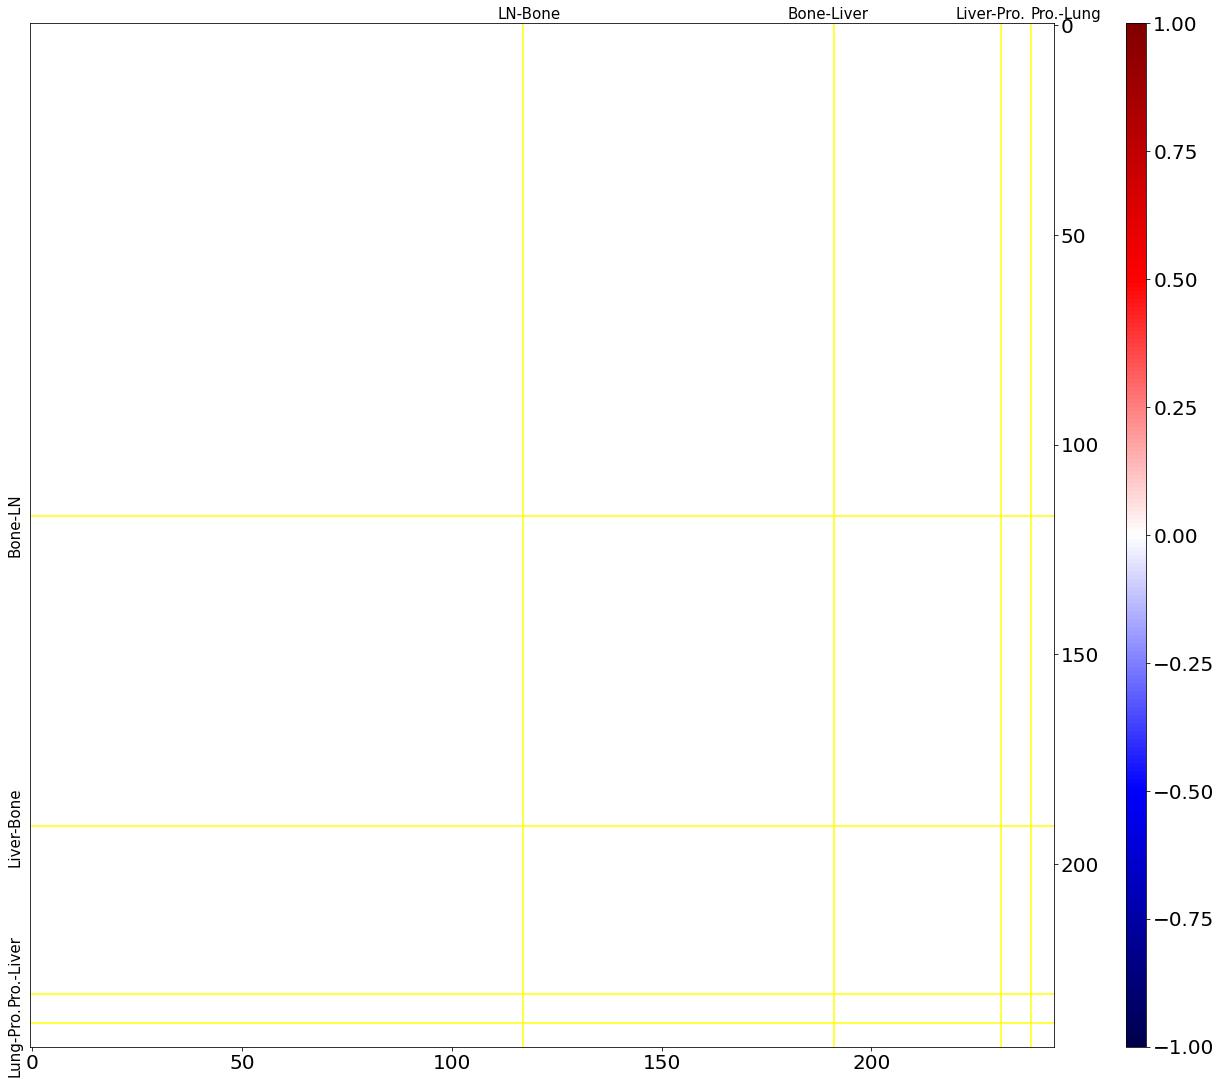

In [361]:
all_ind_intersect_02,all_intersect_02,genes_remove_intersect_ind_02,genes_remove_intersect_02,union_genes_02, union_gene_ind_02,intersect_genes_02,intersect_genes_ind_02=gene_selected_by_diff_threshold('rank_and_scale',[0.2],remove_intersect= True)
sort_within_each_cancer_corr_matrix_02=sort_within_each_cancer(patient_np[0:244,all_ind_intersect_02],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix_02)


In [333]:
all_ind_intersect_025,all_intersect_025,genes_remove_intersect_ind_025,genes_remove_intersect_025,union_genes_025, union_gene_ind_025,intersect_genes_025,intersect_genes_ind_025=gene_selected_by_diff_threshold('rank_and_scale',[0.25],remove_intersect= True)


thresholds 0.25
gene corr with LN 1334
gene corr with bone 1069
gene corr with liver 1268
gene corr with prostate 73
gene corr with lung 27
(2710, 244) (464, 244) (406, 244) (6, 244) (4, 244) (216, 244) (1, 244) (2, 244) (2, 244) (3, 244) (1, 244) (0,)
1442
1


<ipython-input-329-c7b8f8482150>:126: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


In [374]:
all_ind_intersect_03,all_intersect_03,genes_remove_intersect_ind_03,genes_remove_intersect_03,union_genes_03, union_gene_ind_03,intersect_genes_03,intersect_genes_ind_03=gene_selected_by_diff_threshold('rank_and_scale',[0.3],remove_intersect= True)
all_ind_intersect_035,all_intersect_035,genes_remove_intersect_ind_035,genes_remove_intersect_035,union_genes_035, union_gene_ind_035,intersect_genes_035,intersect_genes_ind_035=gene_selected_by_diff_threshold('rank_and_scale',[0.35],remove_intersect= True)


thresholds 0.3
gene corr with LN 631
gene corr with bone 607
gene corr with liver 739
gene corr with prostate 26
gene corr with lung 10
(1537, 244) (234, 244) (180, 244) (1, 244) (1, 244) (66, 244) (0,) (0,) (0,) (1, 244) (0,) (0,)
798
1
1537
thresholds 0.35


<ipython-input-358-1c90513bf48f>:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


gene corr with LN 330
gene corr with bone 377
gene corr with liver 463
gene corr with prostate 3
gene corr with lung 5
(949, 244) (134, 244) (78, 244) (0,) (0,) (19, 244) (0,) (0,) (0,) (0,) (0,) (0,)
486
1
949


<ipython-input-358-1c90513bf48f>:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect_ind, genes_remove_intersect,np.array(union_genes), union_gene_ind,np.array(intersect_genes),intersect_genes_ind


In [306]:
def correlation_with_mask_231(mask, threshold, norm):
    mRNA_np = np.asarray(patient_np[0:231,:-1]) 
    
    if norm == 'linear_scale_and_bin':
        mRNA_np =  min_max_scaler.fit_transform(mRNA_np)
        #np.floor(scale(mRNA_np, 0, 100)) ##why use  100 as the max
        ##we need gene expression values to [0,1] ?????.
        
    if norm == 'log_scale_and_bin':
        mRNA_np = np.log10(mRNA_np+0.0000001) ###为了处理log 0 吧
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        
    if norm == 'rank_and_scale': 
        x = mRNA_np.T ##14379*244
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        mRNA_np =  min_max_scaler.fit_transform(x.T) ##244*14379 
        #scale(x.T,0,100)
    
    if norm == 'logit_origin': #logit-normalisation on the original binned values 
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        mRNA_np = logit(mRNA_np)
        
    if norm == 'logit_log': #logit-normalisation on the log binned values 
        mRNA_np = np.log10(mRNA_np+0.0000001)
        mRNA_np = min_max_scaler.fit_transform(mRNA_np)
        mRNA_np = logit(mRNA_np)
    
    mask_corr = []  # correlations of all genes with the mask
    good_mRNA = []  # selected mRNAs shape: (n*231)
    the_corr = []   # correlations of selected mRNAs with the mask
    mRNA_index = []
    mRNA_np=mRNA_np.T
    for i in range(len(mRNA_np)):
        each = mRNA_np[i]
        corr = np.corrcoef(mask, each)[1,0]
        if corr > threshold or corr<-threshold:
#             print(i, corr)
            good_mRNA.append(each)
            mRNA_index.append(i)
            the_corr.append(corr)
        mask_corr.append(corr)
    return np.array(mask_corr), mRNA_index, np.array(good_mRNA), the_corr

In [413]:

def gene_selected_by_diff_threshold_231(norm,thresholds,remove_intersect= True):
    '''
    returns union_genes, intersect_genes
    '''
    LN_m = [1]*117+(231-117)*[0]
    Bone_m = [0]*117+74*[1]+(40)*[0]
    Liver_m = [0]*191+(40)*[1]
    
    LN_genes = []
    Bone_genes= []
    Liver_genes= []
    union_genes = [] # union, 3d np array (a,b,231), a is length of thresholds list, b is number of union selected genes in each threshold.
    intersect_genes = [] # intersect, 4d np array (a, 3, b, 231), a is length of thresholds list, 3 is 3 cancers intersect.
                            #b is number of union selected genes in each threshold.
    intersect_gene_ind =[]
    union_gene_ind = [] 
    genes_remove_intersect = []
    
    for i in thresholds:
#         print(i)
        correlations, LNgood_ind, LNgood_mRNA, the_corr = correlation_with_mask_231(LN_m, i,norm)
        LN_genes.append(LNgood_mRNA)
        
        correlations,Bonegood_ind, Bonegood_mRNA, the_corr = correlation_with_mask_231(Bone_m, i,norm)
        Bone_genes.append(Bonegood_mRNA)
        
        correlations,Livergood_ind, Livergood_mRNA, the_corr = correlation_with_mask_231(Liver_m, i,norm)
        Liver_genes.append(Livergood_mRNA)
        
        
        LNset = set([tuple(x) for x in LNgood_mRNA])
        Boneset = set([tuple(x) for x in Bonegood_mRNA])
        Liverset = set([tuple(x) for x in Livergood_mRNA])
        LN_Bone_intersect = np.array([x for x in LNset & Boneset])
        Liver_Bone_intersect = np.array([x for x in Boneset & Liverset])
        LN_Liver_intersect = np.array([x for x in Liverset & LNset])
        all_intersect = np.array([x for x in Liverset & LNset & Boneset])
        intersect_genes.append([LN_Bone_intersect, Liver_Bone_intersect, LN_Liver_intersect,all_intersect])
        all_intersect_set=set([tuple(x) for x in all_intersect])
    

        all_ind_intersect = list(set(LNgood_ind) & set(Bonegood_ind) & set(Livergood_ind))
        print('all_ind_intersect',len(all_ind_intersect))
        union_gene_ind=list(set().union(LNgood_ind,Bonegood_ind,Livergood_ind))
        
       
        #print(len(genes_remove_intersect[-1]))
        
        
        LN_Bone_intersect_ind=[set(LNgood_ind).intersection(set(Bonegood_ind))]
        LN_Liver_intersect_ind=[set(LNgood_ind).intersection(set(Livergood_ind))]
        Bone_Liver_intersect_ind=[set(Bonegood_ind).intersection(set(Livergood_ind))]
       
        intersect_genes_ind=[]
        intersect_genes_ind.append([LN_Bone_intersect_ind,LN_Liver_intersect_ind,
                                  Bone_Liver_intersect_ind
                                  ])

        
       
   
    
    
        allgood_mRNA = np.concatenate((LNgood_mRNA,Bonegood_mRNA,Livergood_mRNA), axis=0) 
        allgood_mRNA = np.unique(allgood_mRNA, axis=0) ##axis=0 按列 
        
        ###
        if remove_intersect:    #still working on it 是个parameter 在def里面  T/F
            print(allgood_mRNA.shape, LN_Bone_intersect.shape, LN_Liver_intersect.shape, 
                 Liver_Bone_intersect.shape)
            genes_remove_intersect.append(np.array([x for x in set([tuple(y) for y in allgood_mRNA]) if x not in all_intersect_set]))
            
            genes_remove_intersect_ind=list(set(union_gene_ind).difference(set(all_ind_intersect)))
            
            
            #print(len(genes_remove_intersect[-1]))  #
        union_genes.append(allgood_mRNA)
        print('right_num',len(genes_remove_intersect[0])) 
        print(len(union_genes[-1]))
        print('should be same',len(genes_remove_intersect_ind))
    return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind
         
    

In [414]:
7444-559

6885

In [418]:
all_ind_intersect_231,all_intersect_231,genes_remove_intersect_231,genes_remove_intersect_ind_231,union_genes_231,intersect_genes_231, union_gene_ind_231,intersect_genes_ind_231=gene_selected_by_diff_threshold_231('rank_and_scale',[0.15],remove_intersect= True)
all_ind_intersect_231_02,all_intersect_231_02,genes_remove_intersect_231_02,genes_remove_intersect_ind_231_02,union_genes_231_02,intersect_genes_231_02, union_gene_ind_231_02,intersect_genes_ind_231_02=gene_selected_by_diff_threshold_231('rank_and_scale',[0.2],remove_intersect= True)





all_ind_intersect 559
(7444, 231) (2285, 231) (1997, 231) (1391, 231)
right_num 6885
7444
should be same 6885


<ipython-input-413-fb86457285e5>:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


all_ind_intersect 195
(4803, 231) (1151, 231) (955, 231) (605, 231)
right_num 4608
4803
should be same 4608


<ipython-input-413-fb86457285e5>:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


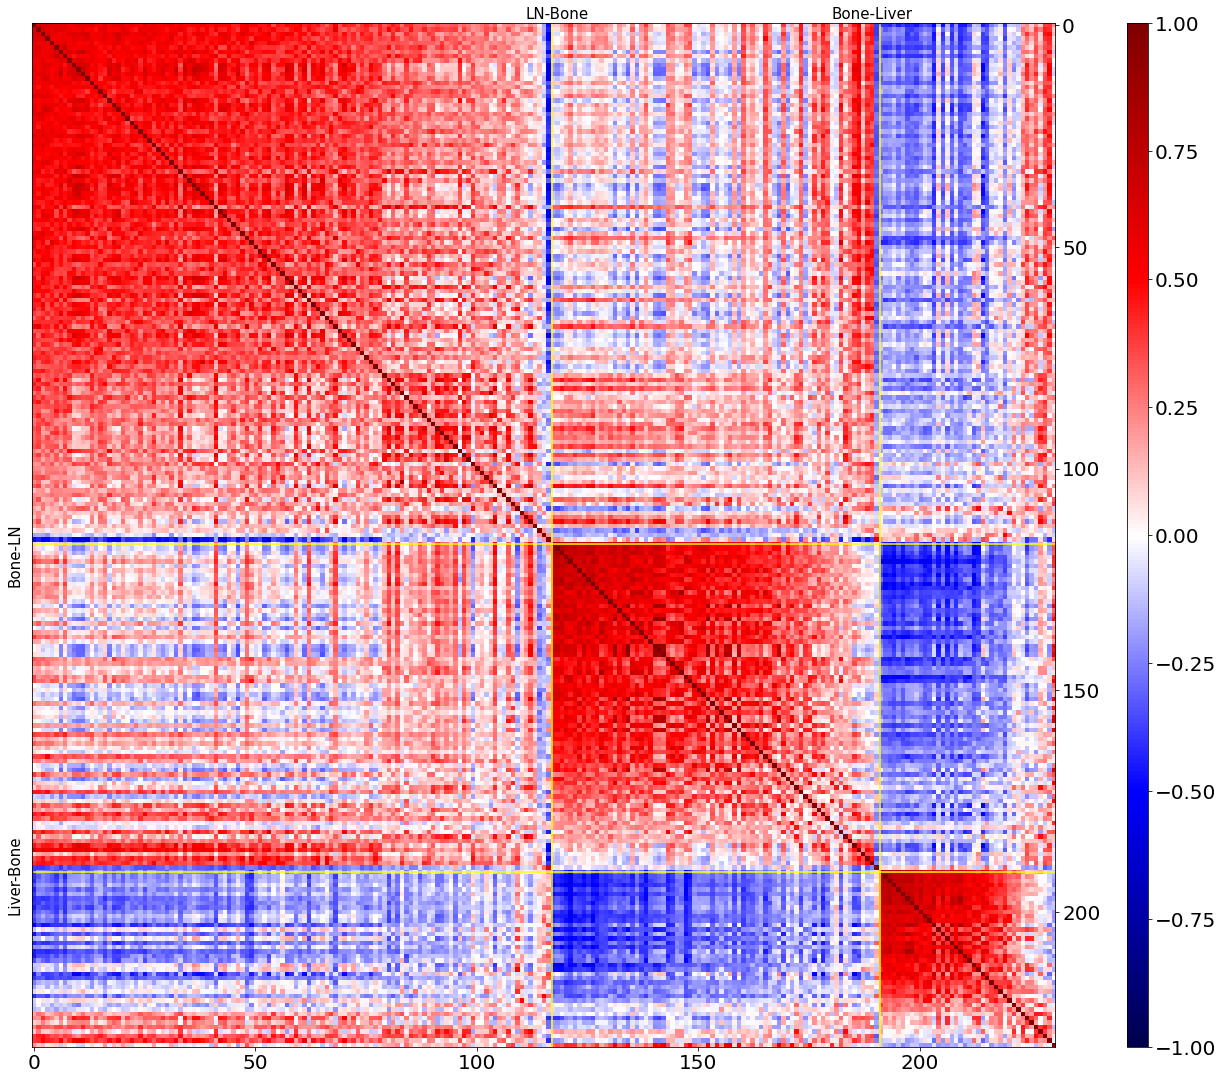

In [422]:
###画和bird 一样的图
len(all_ind_intersect_231)
sort_within_each_cancer_corr_matrix_559_231=sort_within_each_cancer_231(patient_np[0:231,all_ind_intersect_231],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix_559_231)

In [317]:
def plot_heatmap_231(correlation_matrix):
    f = plt.figure(figsize=(20,20))
    
    plt.rc('xtick',labelsize=20)
    plt.rc('ytick',labelsize=20)
    
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    plt.plot([117, 117], [0, 231], 'yellow')
    plt.plot([0, 231], [117, 117], 'yellow')
    plt.plot([191, 191], [0, 231], 'yellow')
    plt.plot([0, 244], [191, 191], 'yellow')
    
    
    plt.text(111, -1.5, 'LN-Bone', fontsize=15)
    plt.text(-6, 126, 'Bone-LN', rotation = 90, fontsize=15)
    plt.text(180, -1.5, 'Bone-Liver', fontsize=15)
    plt.text(-6,200, 'Liver-Bone', rotation = 90, fontsize=15)
    
    
    img = plt.imshow(correlation_matrix, cmap='seismic',vmin=-1, vmax=1, interpolation='nearest') #https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

    ax = plt.subplot(111)
    divider = make_axes_locatable(ax)   
    cax = divider.append_axes("right", size="2%", pad=1)

    plt.colorbar(img,cax=cax)
    plt.savefig('heatmap_231_before_filter.png')

    plt.show()

In [318]:
def sort_within_each_cancer_231(patient_np, norm ):
    
    patient_np=patient_np[:231,:-1]
    if norm == 'rank_and_scale': 
        x = patient_np.T ##14379*244
        def rd(x):
            return  (rankdata(x, method='dense') - 1).astype(int)
        x = np.apply_along_axis(rd, 1, x)
        patient_np =  min_max_scaler.fit_transform(x.T) ##244*14379 
    
    r = np.corrcoef(patient_np, patient_np)
    correlation_matrix = r[0:117, 0:117] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)
    # x = dict(zip(corr_means, range(0,117)))
    # print(x)
    ranks = np.argsort(-corr_means)
    # print(ranks)
    correlation_matrix = r[117:191, 117:191] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t= np.argsort(-corr_means) + 117
    ranks = np.concatenate([ranks, ranks_t]) 
    # print(ranks)
    correlation_matrix = r[191:231, 191:231] #LN 0-117, Bone 117-191, Liver 191-231
    # print(correlation_matrix)
    corr_means = correlation_matrix.mean(axis=0)

    ranks_t = np.argsort(-corr_means) + 191
    ranks = np.concatenate([ranks, ranks_t]) 
    # print(ranks)
    # print(len(ranks))
    # print(ranks.min())
    # print(ranks.max())

    correlation_matrix = r[0:231, 0:231]
    correlation_matrix = correlation_matrix[:, ranks][ranks]
    # print(correlation_matrix)
    # pd.DataFrame(correlation_matrix).to_csv('C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\temp.csv')
    return correlation_matrix


<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


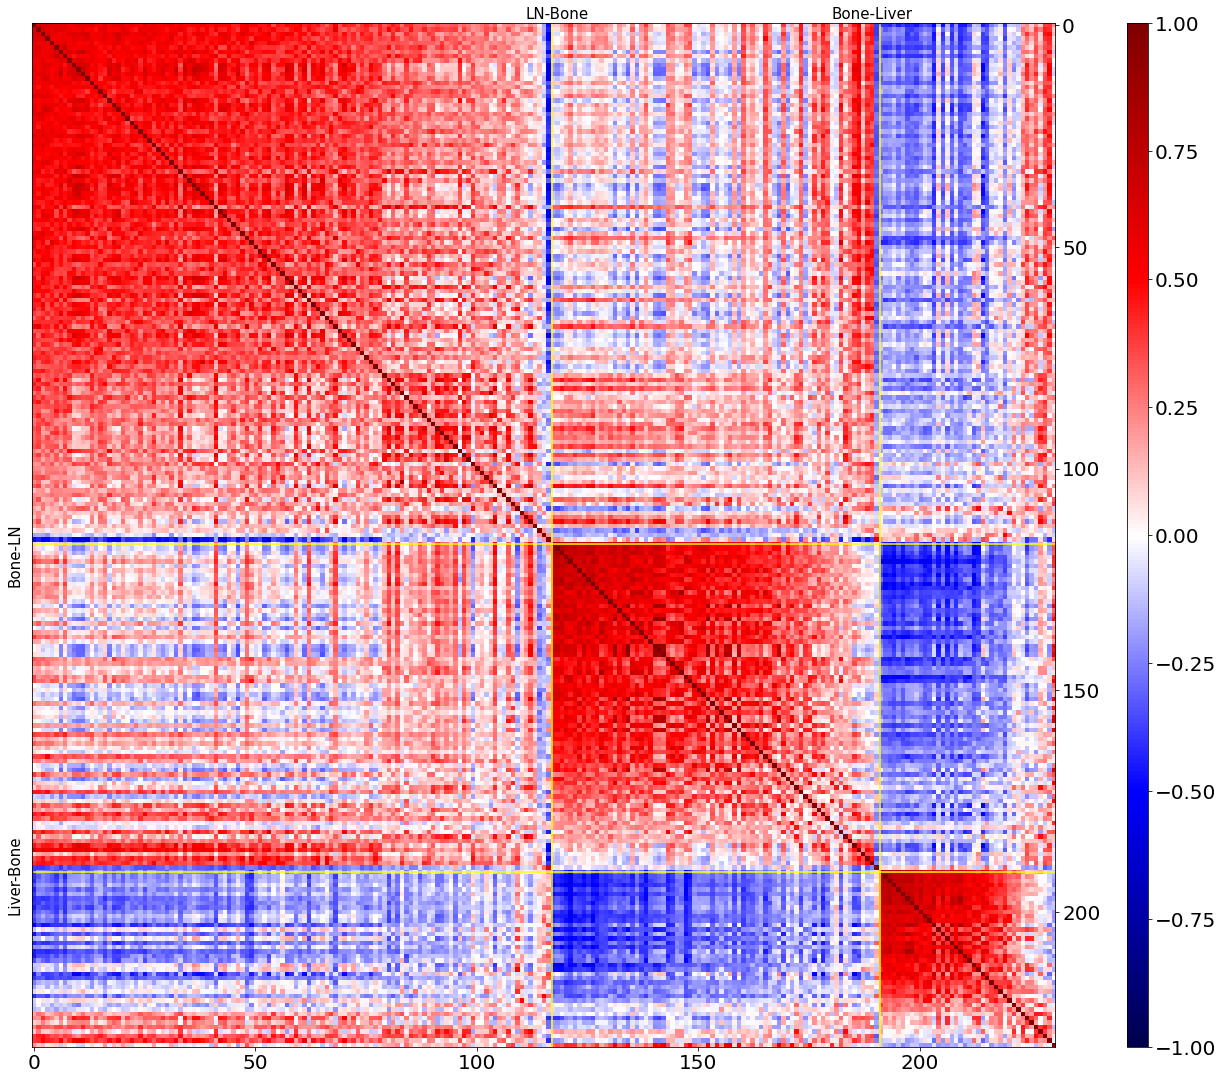

In [351]:
sort_within_each_cancer_corr_matrix_559=sort_within_each_cancer(patient_np[0:244,all_ind_intersect_231],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix_559_231)

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


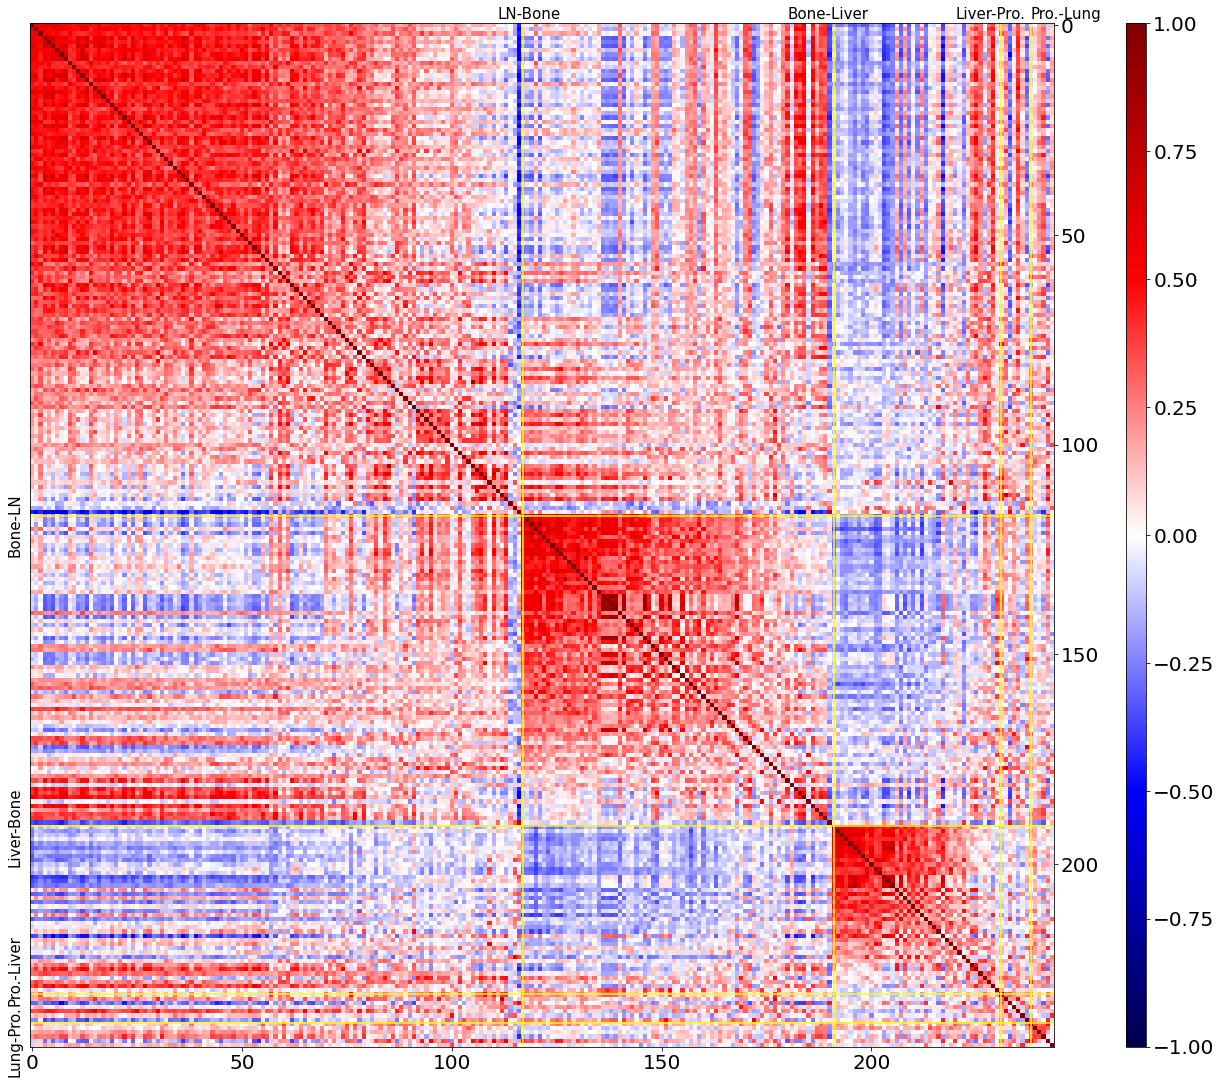

In [314]:
sort_within_each_cancer_corr_matrix_559=sort_within_each_cancer(patient_np[:,all_ind_intersect_231],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix_559)

<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


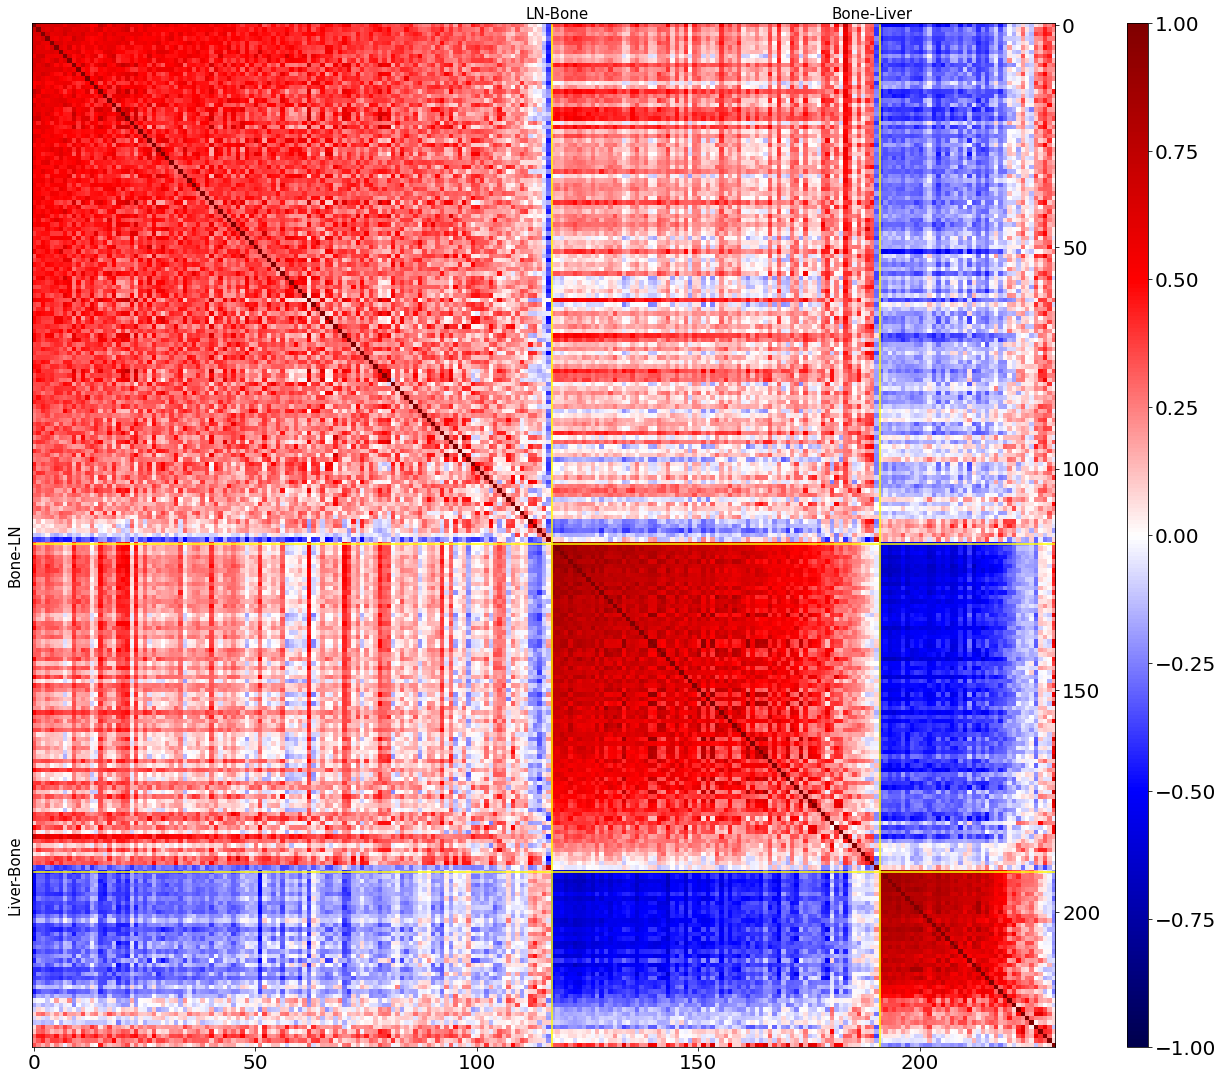

In [353]:
##all_ind_intersect_231_02
sort_within_each_cancer_corr_matrix_559=sort_within_each_cancer_231(patient_np[:231,all_ind_intersect_231_02],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix_559)

In [362]:
all_ind_intersect_231_02,all_intersect_231_02,genes_remove_intersect_231_02,genes_remove_intersect_ind_231_02,union_genes_231_02,intersect_genes_231_02, union_gene_ind_231_02,intersect_genes_ind_231_02=gene_selected_by_diff_threshold_231('rank_and_scale',[0.2],remove_intersect= True)
all_ind_intersect_231_03,all_intersect_231_03,genes_remove_intersect_231_03,genes_remove_intersect_ind_231_03,union_genes_231_03,intersect_genes_231_03, union_gene_ind_231_03,intersect_genes_ind_231_03=gene_selected_by_diff_threshold_231('rank_and_scale',[0.3],remove_intersect= True)
all_ind_intersect_231_035,all_intersect_231_035,genes_remove_intersect_231_035,genes_remove_intersect_ind_231_035,union_genes_231_035,intersect_genes_231_035, union_gene_ind_231_035,intersect_genes_ind_231_035=gene_selected_by_diff_threshold_231('rank_and_scale',[0.35],remove_intersect= True)
all_ind_intersect_231_04,all_intersect_231_04,genes_remove_intersect_231_04,genes_remove_intersect_ind_231_04,union_genes_231_04,intersect_genes_231_04, union_gene_ind_231_04,intersect_genes_ind_231_04=gene_selected_by_diff_threshold_231('rank_and_scale',[0.4],remove_intersect= True)


all_ind_intersect 195
(4803, 231) (1151, 231) (955, 231) (605, 231)
2324
4803


<ipython-input-356-f149a0114f52>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


all_ind_intersect 9
(1658, 231) (289, 231) (207, 231) (85, 231)
819
1658


<ipython-input-356-f149a0114f52>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


all_ind_intersect 2
(1024, 231) (162, 231) (96, 231) (23, 231)
503
1024


<ipython-input-356-f149a0114f52>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


all_ind_intersect 1
(681, 231) (91, 231) (43, 231) (9, 231)
323
681


<ipython-input-356-f149a0114f52>:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return all_ind_intersect,all_intersect,genes_remove_intersect,genes_remove_intersect_ind,np.array(union_genes), np.array(intersect_genes), union_gene_ind,intersect_genes_ind


<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


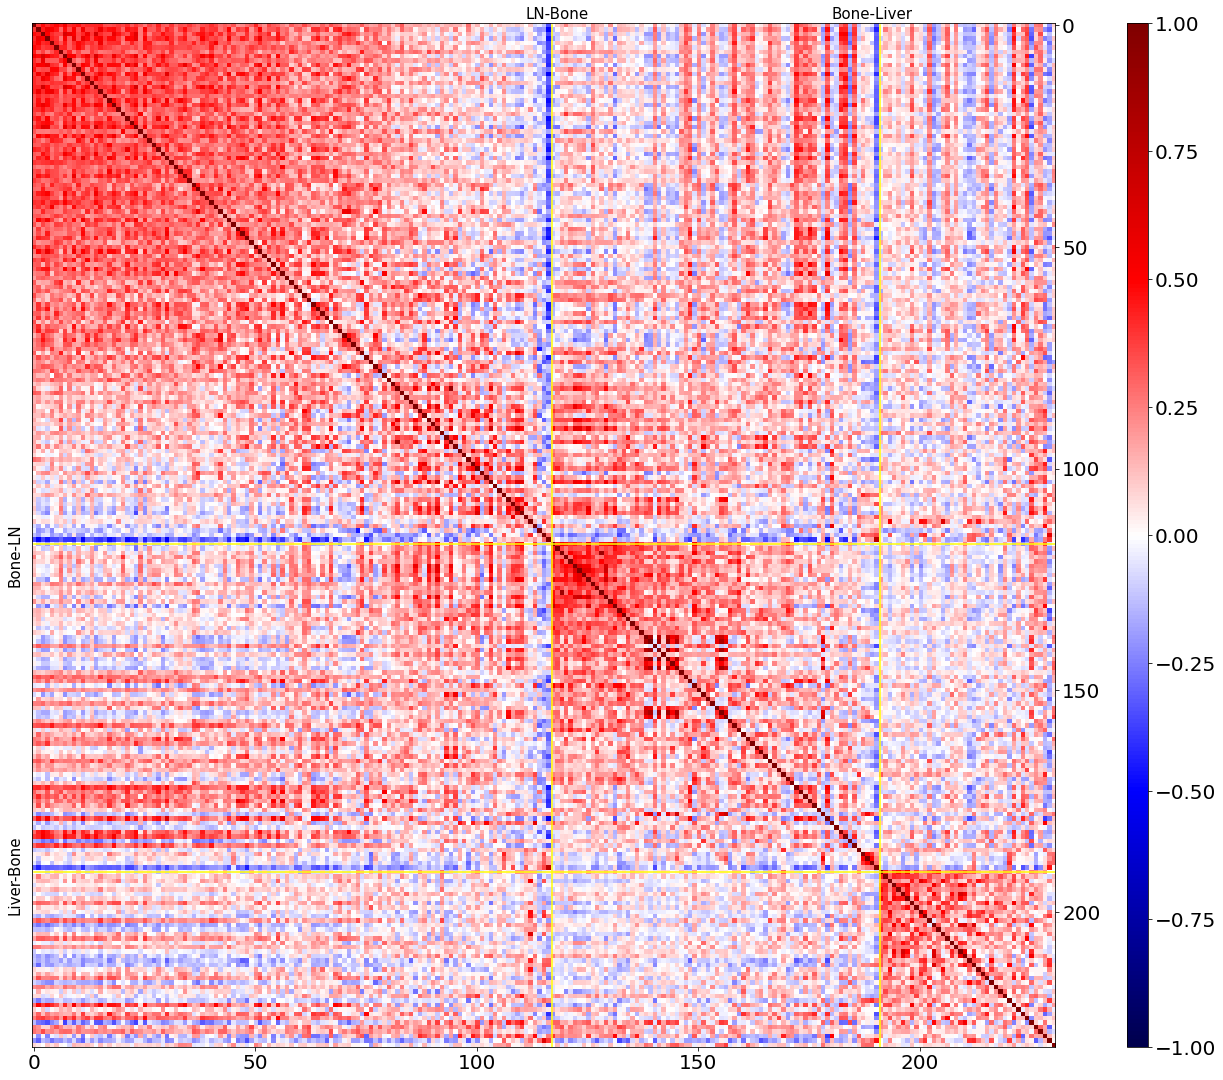

In [344]:
###get_remove_intercet genes 画图 231数据
sort_within_each_cancer_corr_matrix=sort_within_each_cancer_231(patient_np[:231,genes_remove_intersect_ind_231],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix)

<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


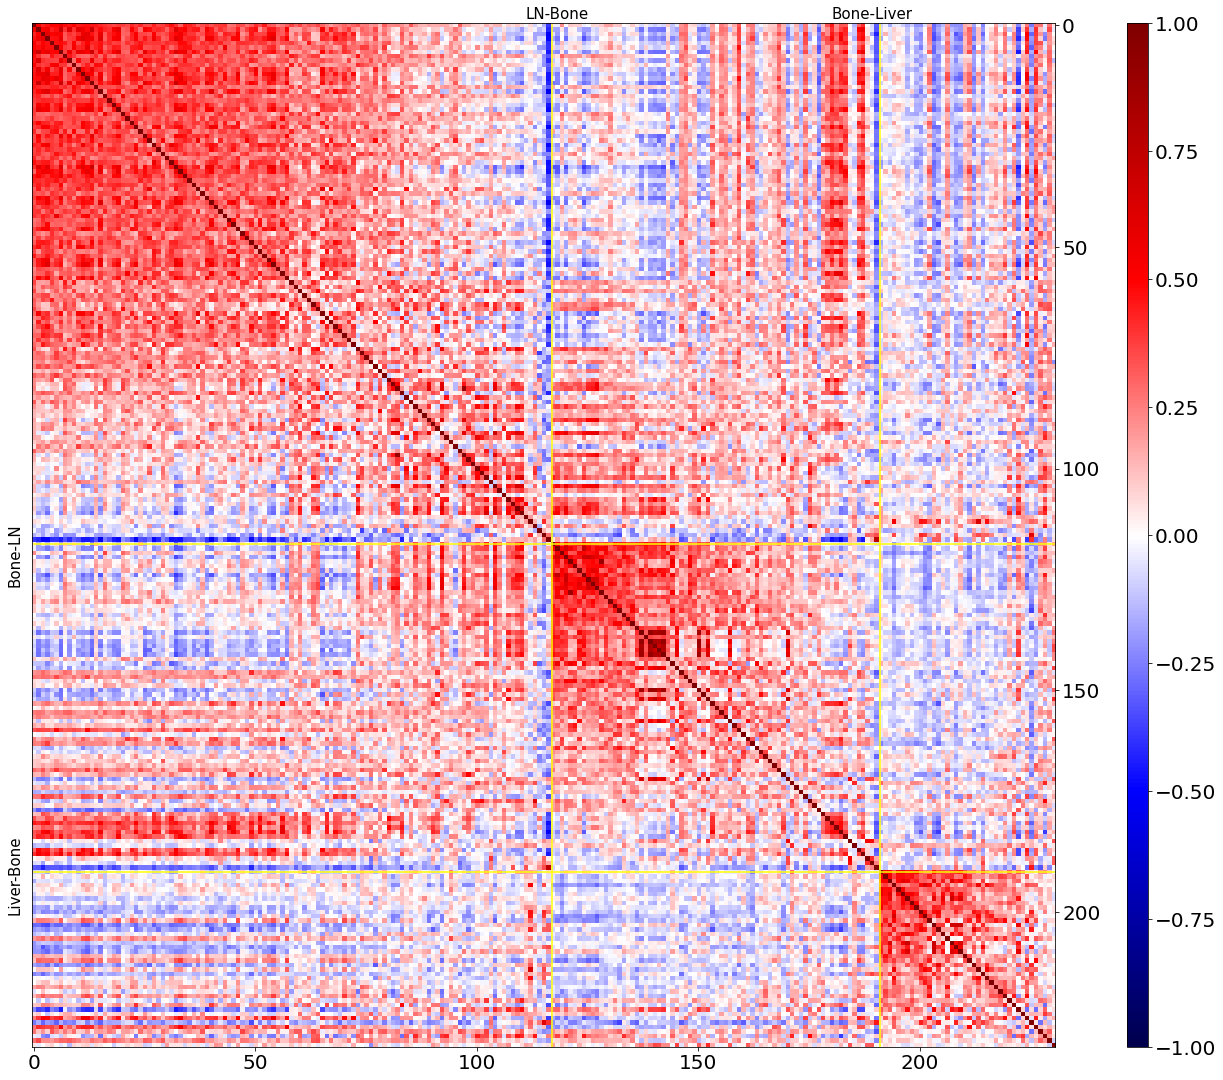

In [345]:
sort_within_each_cancer_corr_matrix=sort_within_each_cancer_231(patient_np[:231,genes_remove_intersect_ind_231_02],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix)

<ipython-input-317-0d8bc62e0605>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


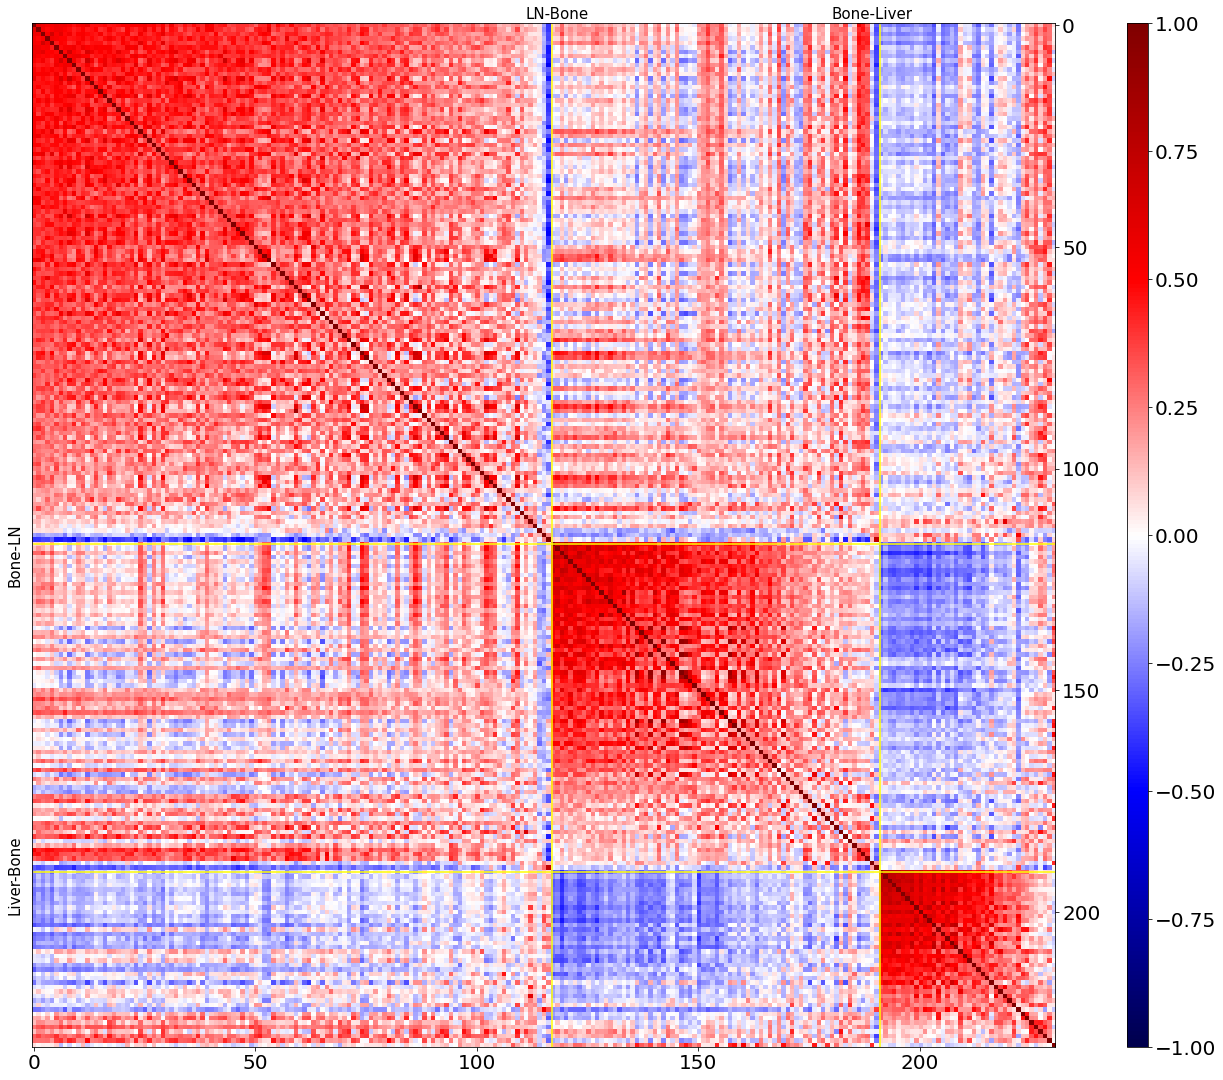

In [346]:
sort_within_each_cancer_corr_matrix=sort_within_each_cancer_231(patient_np[:231,genes_remove_intersect_ind_231_03],'rank_and_scale')
plot_heatmap_231(sort_within_each_cancer_corr_matrix)

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


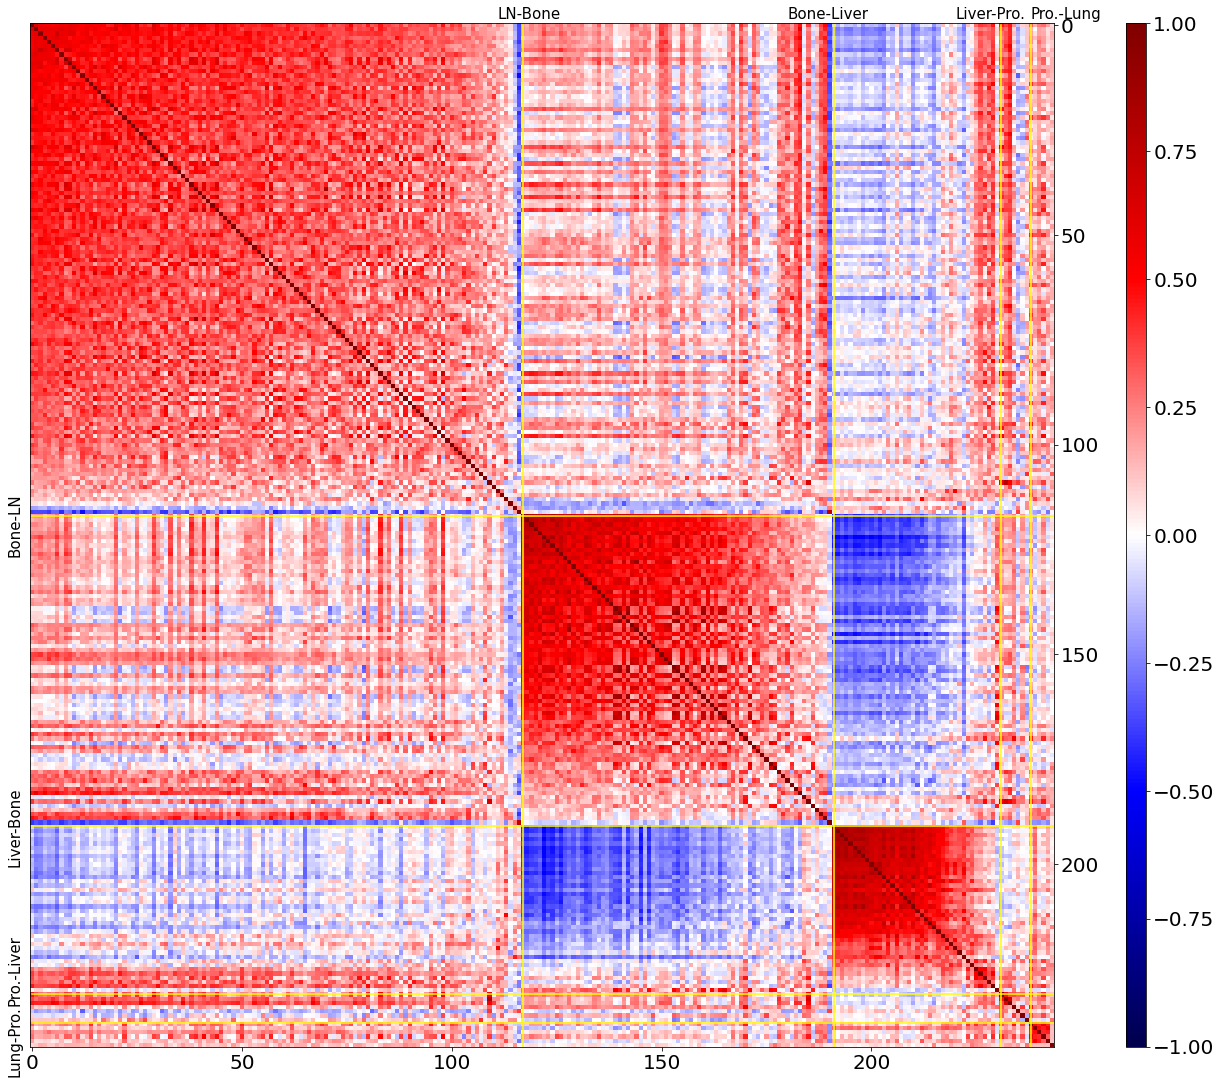

In [350]:

sort_within_each_cancer_corr_matrix=sort_within_each_cancer(patient_np[:,genes_remove_intersect_ind_035],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix)



<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


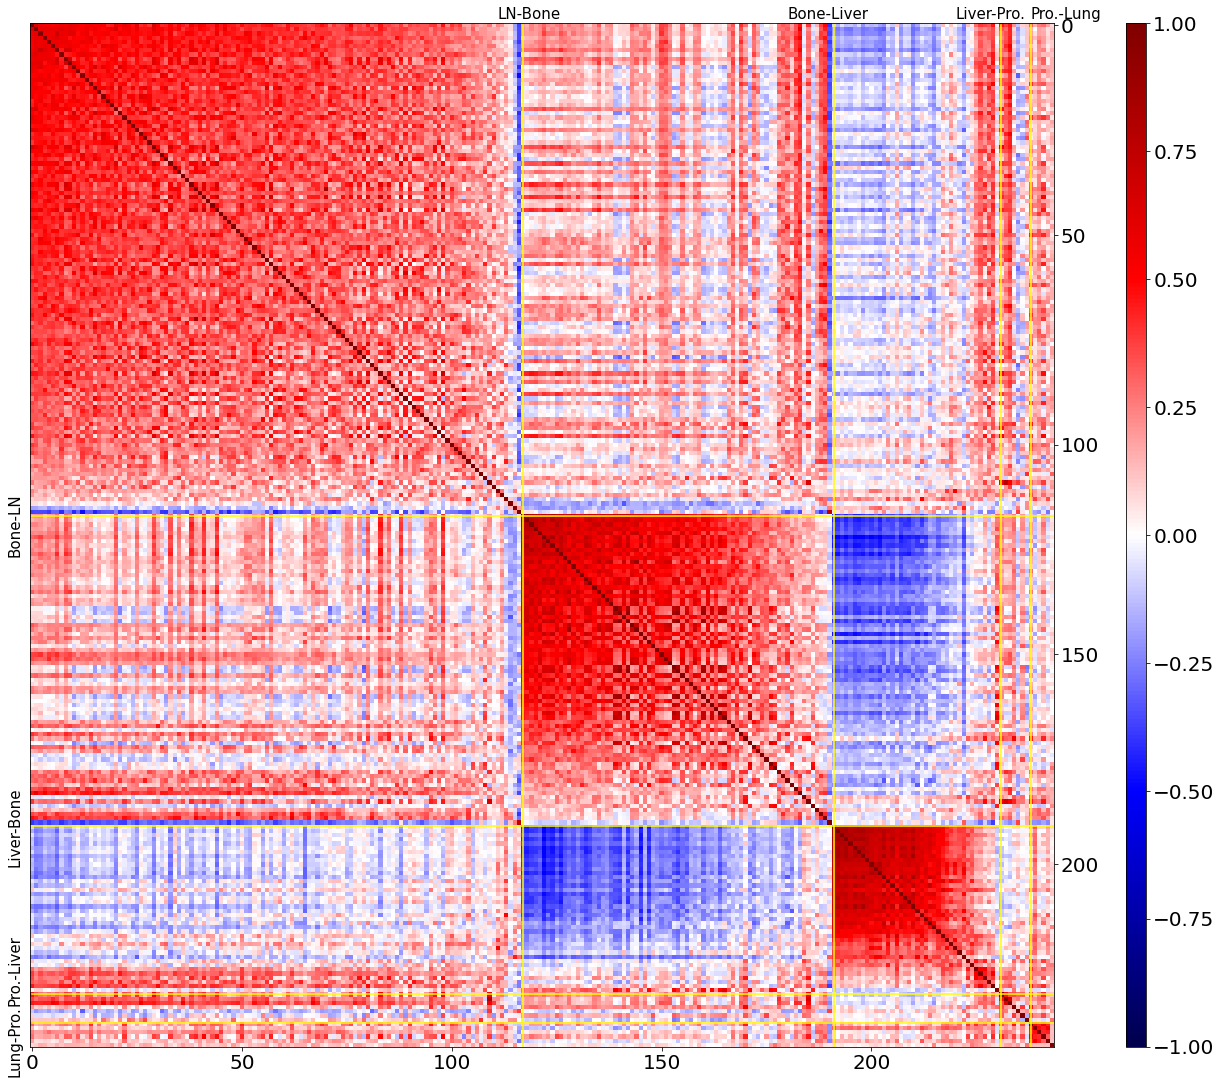

In [367]:
##231  union gene do not remove 
sort_within_each_cancer_corr_matrix=sort_within_each_cancer(patient_np[:,genes_remove_intersect_ind_035],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix)



In [373]:
print(len(genes_remove_intersect_ind_035))
print(len(union_gene_ind_035))

949


949

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


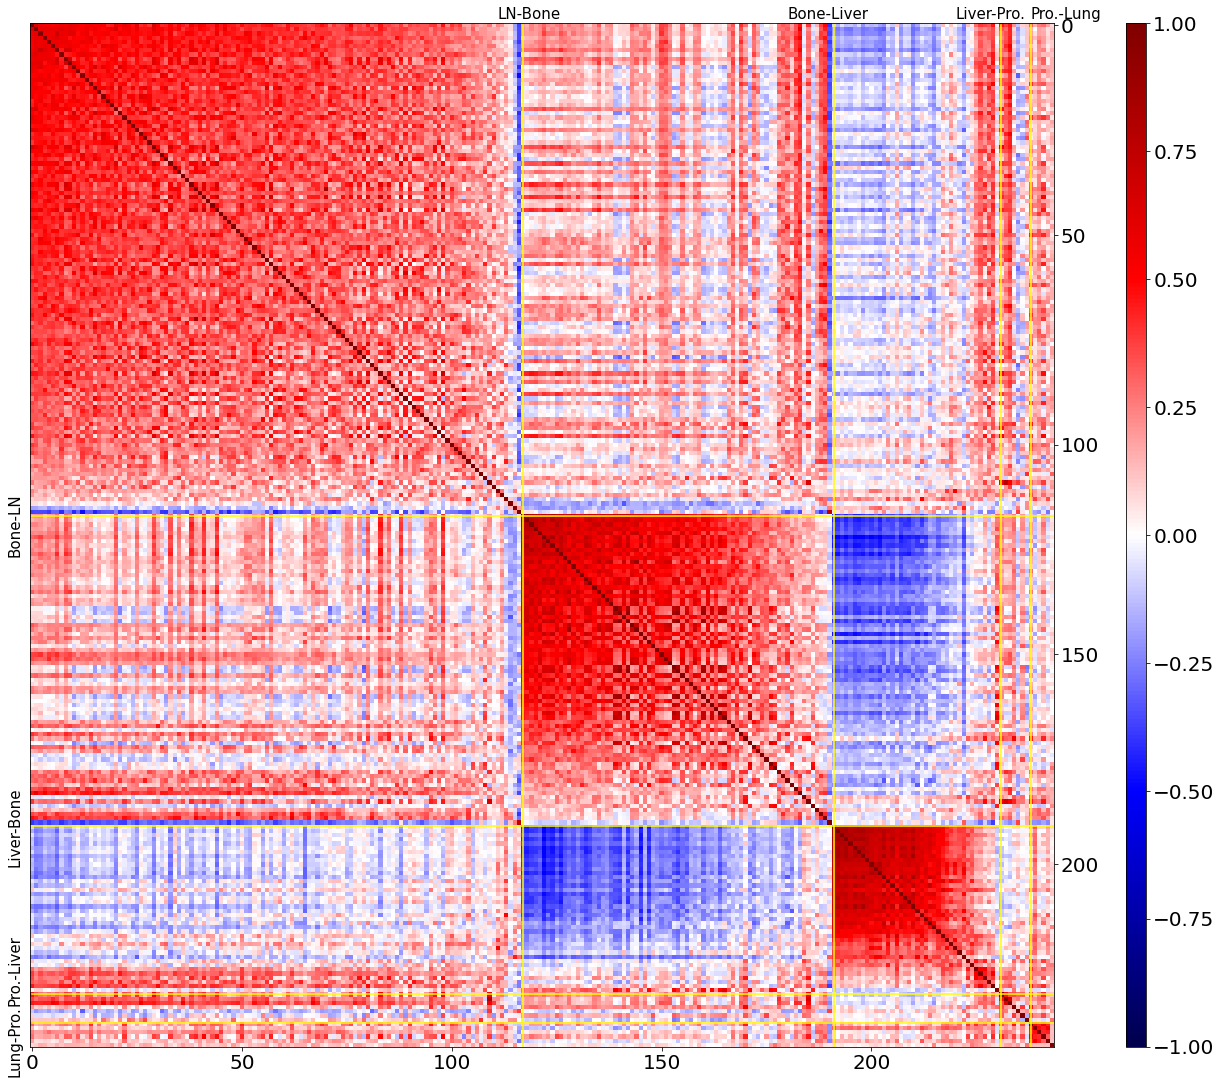

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


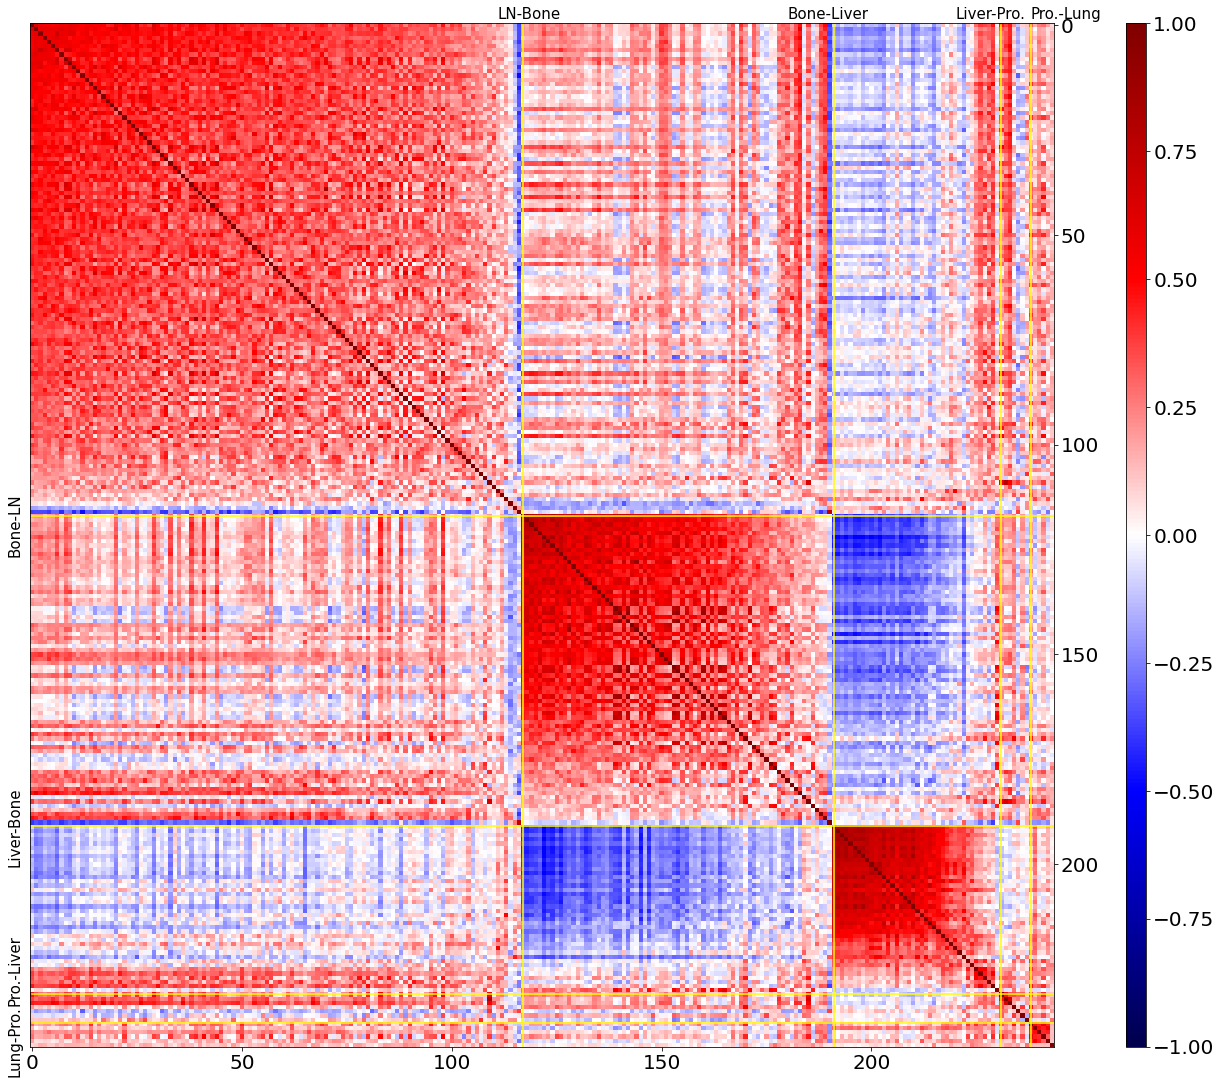

In [369]:
sort_within_each_cancer_corr_matrix=sort_within_each_cancer(patient_np[:,genes_remove_intersect_ind_035],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix)
sort_within_each_cancer_corr_matrix=sort_within_each_cancer(patient_np[:,union_gene_ind_035],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix)

<ipython-input-207-bc893d3c29fb>:110: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


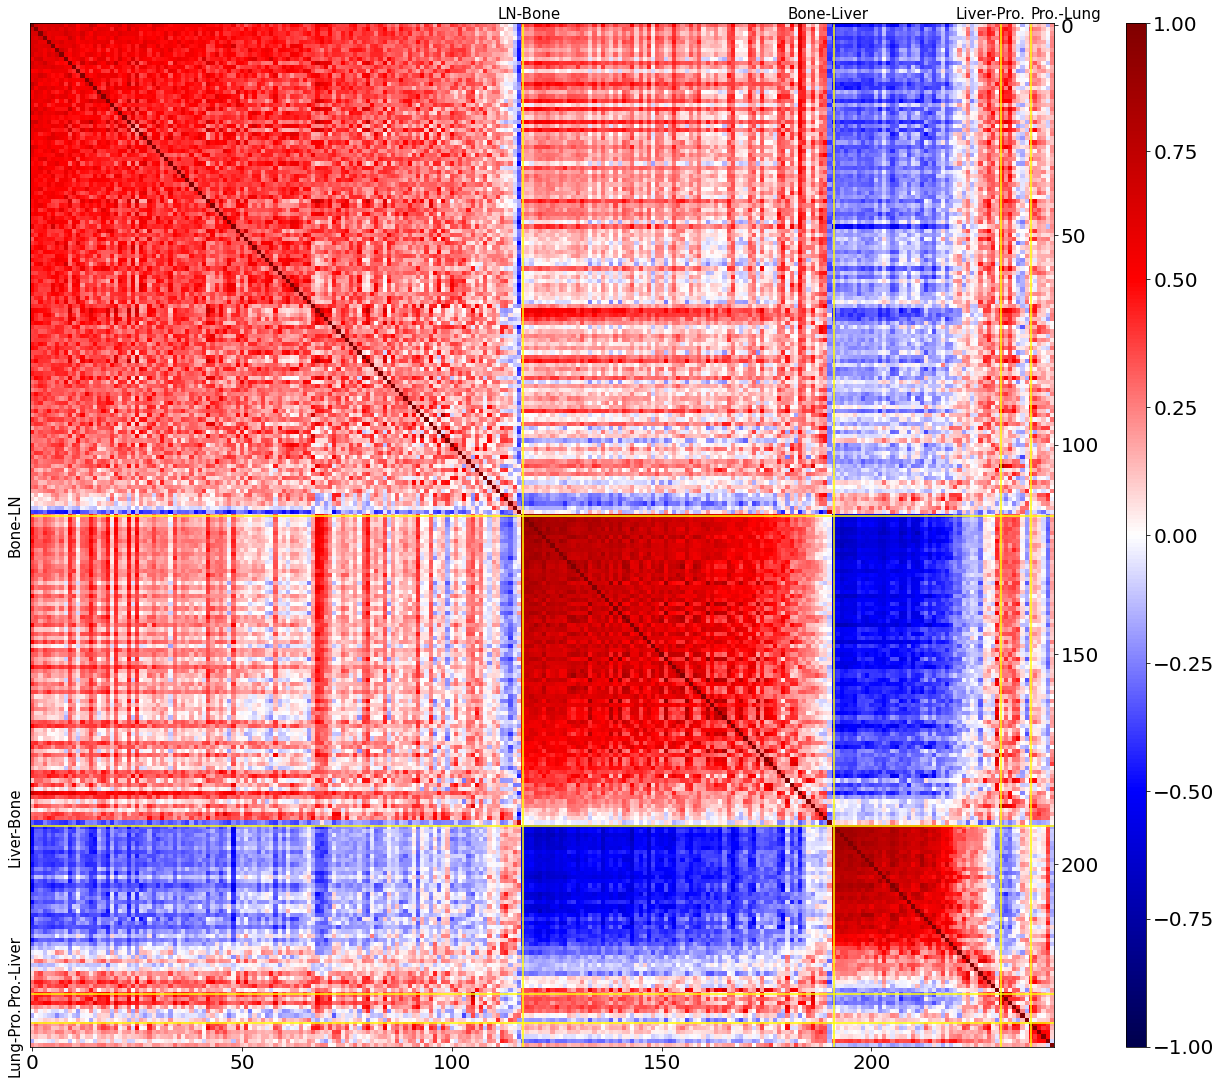

In [424]:
len(all_ind_intersect_231)
sort_within_each_cancer_corr_matrix_559_231=sort_within_each_cancer(patient_np[:,all_ind_intersect_231_02],'rank_and_scale')
plot_heatmap(sort_within_each_cancer_corr_matrix_559_231)

In [428]:

%store all_ind_intersect_231_02
%store all_intersect_231_02
%store all_ind_intersect_231
%store all_intersect_231
%store genes_remove_intersect_035
%store genes_remove_intersect_ind_035
%store all_ind_intersect_01
%store all_intersect_01
%store mRNA_244_df
%store patient_mRNA
%store patient_np

Stored 'all_ind_intersect_231_02' (list)
Stored 'all_intersect_231_02' (ndarray)
Stored 'all_ind_intersect_231' (list)
Stored 'all_intersect_231' (ndarray)
Stored 'genes_remove_intersect_035' (list)
Stored 'genes_remove_intersect_ind_035' (list)
Stored 'all_ind_intersect_01' (list)
Stored 'all_intersect_01' (ndarray)
Stored 'mRNA_244_df' (DataFrame)
Stored 'patient_mRNA' (list)
Stored 'patient_np' (ndarray)


In [446]:
print(all_ind_intersect_01)

[9731, 3590, 5641, 2070, 8736, 4133, 8741, 3112, 9778, 1077, 9781, 4160, 4699, 9309, 12382, 13409, 7277, 4721, 12414, 9349, 8862, 1185, 3236, 5799, 10417, 4788, 1210, 10427, 188, 12477, 6845, 7878, 5838, 9426, 7379, 6869, 13037, 242, 12020, 8438, 5366, 8440, 1277, 13579, 1295, 1807, 7953, 3356, 6947, 7461, 807, 808, 3880, 4395, 5932, 7474, 6970, 1850, 4924, 4425, 14167, 9056, 2913, 14178, 12133, 4968, 7543, 7544, 12664, 2430, 10624, 3468, 1933, 1432, 926, 11679, 8095, 2997, 13255, 4560, 9176, 8668, 1001, 8685, 11766, 13817, 5116, 5630]
